# <center> Sentiment analysis with deep learning

## <b><I>Introduction

<p style="text-indent: 2.5em;">
    Many people share their experiences on social media such as Facebook and Reddit nowadays, and this behavior is beneficial for businesses. The operational evaluation process is more cost-effecitive and on time. Real customers' voice is easier to be gathered and the cost is lower than traditional methods such as market research and focus group interview.
<p style="text-indent: 2.5em;">    
    Sentiment analysis is a popular method to derive meaningful data from comments on social media. It applies natural language processing, text analysis and computational linguistics to systematically identify states of subjective information such as customers' emotion.
<p style="text-indent: 2.5em;">
    This study objective is to collect social media feedback from the customers of three public hospitals, including Ramathibodi, Chulalongkorn, and Siriraj hospital. Sentiment analysis is used to conclude if a comment is in a positive or negative way, and a comment is extracted its topics by syntactic analysis. The results from each comment group are visualized by word cloud and grouped according to business views.

## <b><I> Methodology

<p style="text-indent: 2.5em;">
    This study consists of 3 main processes as below flow chart.

![](./fig/01_1method.PNG)

<b>1) Gathering customers' voice from a social media</b>
<p style="text-indent: 2.5em;">
    This study scrapes customers' voice from a website, "honestdocs.com". The comments are retireved along with their satisfaction scores (i.e., 1 (dissatisfaction) to 5 (satisfaction)).

<b>2) Data preparation</b>

2.1 Standardize language:<br>
<p style="text-indent: 2.5em;">
    This study translates all comments to English using Google API when the scraped comments includes more than a language.

2.2 Deduplicate comments<br>

2.3  Label scores:
<p style="text-indent: 2.5em;">
    Each comment is classified to be either positive or negative considering realted satisfaction score. The score equal to or lower than 2 is considered as a negative comment whereas a positive comment requires 4 points or higher. However, the score at 3 is assumed to be unclear case and they are eliminated during model development.
       
2.4  Normalize comments:
<p style="text-indent: 2.5em;">
    The comments from socail media always contain inconsistency words and signs. Hence, word normalization is improtant. The fundamental issues to be taken into account are as below;
    
- Stopwords
- Negation
- Lower case
- Newline
- Special characters
- White space
- Number in numeric and number in text
- Apostrophe
- Lemmatize

2.5 Balance classes and split data:</b>
<p style="text-indent: 2.5em;">
    Imbalance class leads to poor model performance from training bias, and random undersampling is a successful method to deal with it. After that, splitting data with class stratification is done to prepare data for model development. There are 3 data sets needed including train (80%), test (10%), and validation set (10%).

<b>3) Model experiment </b><br>

3.1  Develop model architectures:
<p style="text-indent: 2.5em;">
    This studty includes 2 experiments of deep learngin model. Both sequencial model and non-sequencial model are chosen. They are <b> LSTM </b> and <b> CNN</b>. However, the first layer of both are word embedding. The weight matrix from <b>a pre-trained model called </b> <a href="https://nlp.stanford.edu/pubs/glove.pdf">Global Vectors for Word Representation (GloVe) </a> is used to fulfill the thread of small sample size.
    
3.2  Tune hyperparameters:
<p style="text-indent: 2.5em;">
    Many combinations of value across hypermeters are set and examine the model with test set. A set of values which gives a model the highest accuracy will be adopted for the final validation.
    
3.3  Evaluate model performance:
<p style="text-indent: 2.5em;">
    The performance between 2 deep learning techniques are compared by accuracy, precision and recall.

<b>4) Result conclusion and dicussion</b><br>    

4.1 Analysis on error<br>
<p style="text-indent: 2.5em;">
    Prediction error of validation set from 2 experimental models, LSTM and CNN, are compared.
    
4.2 Dicussion and Conclusion<br>
<p style="text-indent: 2.5em;">
    This section is to dicuss the possible reasons of error prediction on validation set and performace of each experimental model. 
    
4.3 Conclude the result in business perspectives<br>
<p style="text-indent: 2.5em;">
    Pretend that satisfaction scores do not exist. This step is to apply the best sentiment model to comments for class prediction, either it is positive or negative. Additionally, a comment is extracted its topics by syntactic analysis called POS tagging and shallow phrasing. Then the topics and their number of appearance are counted and presented as a <b>word cloud</b> regarding predicted class and belonging hospital. The biggest size means the most frequency.

# Get start!

<p style="text-indent: 2.5em;">
    Load all related libraries.

In [2]:
# web scraping
import requests
from bs4 import BeautifulSoup
from time import time, sleep
from random import randint


# translation with Google API
import os    
from google.cloud import translate
from tqdm import tqdm
import numpy as np
import pandas as pd


# preprocessing
import txt_processing as txt_proc # udf package
from seqmodel_dataprep import nlp_catout_train, nlp_catout_test # udf package
from keras.preprocessing.text import Tokenizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


# model development
from keras import backend as K
from keras import initializers
import tensorflow as tf
import random as rn
from keras.models import Sequential, load_model
from keras.layers import *
from keras.optimizers import RMSprop
from tensorflow.keras import losses
from itertools import product
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras_tqdm import TQDMNotebookCallback
from collections import OrderedDict
from sklearn.externals import joblib
#import TextBlob


# model evaluation
import model_evaluation as model_eval # udf package


# data visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import wordsum as wordsum # udf package

Using TensorFlow backend.
C:\Users\Jitsama\Anaconda3\envs\deeplearn_env\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# Set dataframe display
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)

In [4]:
# Fix random seed for reproducibility
seed = 27

os.environ['PYTHONHASHSEED'] = '0'

# Setting the seed for numpy-generated random numbers
np.random.seed(seed)

# Setting the seed for python random numbers
rn.seed(seed)

# Setting the graph-level random seed
tf.set_random_seed(seed)

#Force Tensorflow to use a single thread
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

#Force Tensorflow to use a single thread
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

## 1) Gathering customers' voice from a social media

<p style="text-indent: 2.5em;">
The comments from 'honestdoc.com' of 3 public hospitals including Ramathibodi, Chulalongkorn, and Siriraj are scraped and used as data source.

In [ ]:
def honestdoc_comment(url):
    """
    This function is to scrap data from a webboard (https://www.honestdocs.co).
    The input is a string of url.
    The output will be 2 lists including a list of comments and scores.
    """
    #create connection
    data = requests.get(url)
    print('requests code : {}'.format(data.status_code)) 
    print('note\n2xx: success\n4xx, 5xx: error')
    
    #scrape comment and score
    start_time = time() #start scraping data from page1
    r = requests.get(url, params=dict(query='web scraping',page=1)) 
    soup = BeautifulSoup(r.text,'html.parser')
    n = len(soup.find_all('div',{'class':'comments__content'})) #find n of items in the page
    
    #extract each item
    comment = [soup.find_all('div',{'class':'comments__content'})[i].get_text().strip() for i in range(0,n)]
    score = [soup.find_all('span',{'class':'stars star-rating'})[i].attrs['data-score'] for i in range(0,n)]
    elapsed_time = time() - start_time #finish scraping data from page1
    print('Time used for scraping data from page-1 : {} s'.format(elapsed_time))
    sleep(randint(1,3)) #mimic human behavior
           
    p = 2 #start scraping data from page2
    while n > 0: #until the number of items in a page = 0
        start_time = time() 
        r = requests.get(url, params=dict(query='web scraping',page=p))
        soup = BeautifulSoup(r.text,'html.parser')
        n = len(soup.find_all('div',{'class':'comments__content'}))
        [comment.append(soup.find_all('div',{'class':'comments__content'})[i].get_text().strip()) for i in range(0,n)]
        [score.append(soup.find_all('span',{'class':'stars star-rating'})[i].attrs['data-score']) for i in range(0,n)]
        elapsed_time = time() - start_time
        print('Time used for scraping data from page-{} : {} s'.format(p, elapsed_time))
        p +=1
        sleep(randint(1,3))
    
    #backup data 
    pd.DataFrame({'comment': comment, 'score': score}).to_csv('./log/data/comment_'+str(url[url.rfind('/')+1:])+'.csv', index=False)
    
    return comment, score

<b> Ramathibodi

In [ ]:
comment_rama, score_rama = honestdoc_comment(r'https://www.honestdocs.co/hospitals/ramathibodi-hospital')

<b> Chula

In [ ]:
comment_chula, score_chula = honestdoc_comment(r'https://www.honestdocs.co/hospitals/king-chulalongkorn-memorial-hospital')

<b> Siriraj

In [ ]:
comment_siri, score_siri = honestdoc_comment(r'https://www.honestdocs.co/hospitals/siriraj-hospital')

In [5]:
# restore data
comment_rama = pd.read_csv('./log/data/comment_ramathibodi-hospital.csv').iloc[:,0]
comment_chula = pd.read_csv('./log/data/comment_king-chulalongkorn-memorial-hospital.csv').iloc[:,0]
comment_siri = pd.read_csv('./log/data/comment_siriraj-hospital.csv').iloc[:,0]

score_rama = pd.read_csv('./log/data/comment_ramathibodi-hospital.csv').iloc[:,1]
score_chula = pd.read_csv('./log/data/comment_king-chulalongkorn-memorial-hospital.csv').iloc[:,1]
score_siri = pd.read_csv('./log/data/comment_siriraj-hospital.csv').iloc[:,1]

In [6]:
#explore results
print('rama:\n{}\n'.format(comment_rama[:1]))
print('chula:\n{}\n'.format(comment_chula[:1]))
print('siriraj:\n{}\n'.format(comment_siri[:1]))

rama:
0    เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต้นปีที่แล้ว ได้เข้ารักษาเลเซอร์บนในหน้า พยสบสลกับคุณหมอใจดีมากๆ เป็นกันเอง ดูแลอย่างทั่วถึง รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ ไม่ถึง5นาทีการรักษา ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ ค่ารักรักษาพยนบาลไม่แพงด้วย
Name: comment, dtype: object

chula:
0    ไปรับการตรวจเรื่องเม็ดเลือดในปัสสาวะค่ะ ต้องจองคิวค่อนข้างนาน โทรจองก่อนค่ะ แต่บริการค่อนดีมากค่ะ คุณหมอดูป็นกันเองมาก ประทับใจในด้านบริการ พยาบาลน่ารัก คอยให้คำแนะนำว่าต้องทำยังไง หมอเฉพาะทางที่เก่งมาก ให้คำปรึกษาดีมาก และบอกว่าไม่ต้องเป็นกังวลค่ะ ส่วนเรื่องการเดินทางมาโรงพยาบาลสะดวกมากค่ะ จะนั่งรถไฟฟ้าหรือรถใต้ดินมาก็ได้ ขับรถมาก็มีที่จอดค่ะ
Name: comment, dtype: object

siriraj:
0    ใช้บริการปรึกษาเรื่องแผลคีลอยด์ที่บริเวรต้นแขน อยากปรึกษาว่าจะผ่าตัดออกหรือฉีดยาดีใช้เวลารอพอประมานเพราะเป็น รพ.รัฐ คุณหมอให้คำปรึกษาดีมาก ทำให้เราสบายใจและตัดสินใจว่าจะทำอย่างไรกับแผล ซึ่งฉีดจะใช้ระยะเวลาในการฉีดหลายครั้งเพื่อลดขนาด แต่ผ่าตัดแผลออกทำ

In [7]:
print('n comment rama: {}'.format(len(comment_rama)))
print('n comment chula: {}'.format(len(comment_chula)))
print('n comment siriraj: {}'.format(len(comment_siri)))

n comment rama: 224
n comment chula: 353
n comment siriraj: 131


>>There are 223 comments included in this study. However, The data expolration presents the comments in Thai and English.

## 2) Data preparation

![](./fig/01_1.1method.PNG)

### 2.1  Comment translation

<p style="text-indent: 2.5em;">
   The comments in this study are either Thai or English. Therefore, they should be standardized as English. Google translate API is the tool in this study.

In [ ]:
# set the google credential
credential_path = r'.\credential.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

# Instantiates a client
translate_client = translate.Client()

# The target language
target = 'en'

In [ ]:
# translates some text into eng
comment_rama_eng = [translate_client.translate(comment_rama[i], target_language=target)['translatedText'] \
                    for i in tqdm(range(len(comment_rama)))]

comment_chula_eng = [translate_client.translate(comment_chula[i], target_language=target)['translatedText'] \
                     for i in tqdm(range(len(comment_chula)))]

comment_siri_eng = [translate_client.translate(comment_siri[i], target_language=target)['translatedText'] \
                    for i in tqdm(range(len(comment_siri)))]

In [ ]:
# backup data
pd.DataFrame(comment_rama_eng).to_csv('./log/data/comment_rama_eng.csv')
pd.DataFrame(comment_chula_eng).to_csv('./log/data/comment_chula_eng.csv')
pd.DataFrame(comment_siri_eng).to_csv('./log/data/comment_siri_eng.csv')

In [8]:
# restore data
comment_rama_eng = pd.read_csv('./log/data/comment_rama_eng.csv').iloc[:,1]
comment_chula_eng = pd.read_csv('./log/data/comment_chula_eng.csv').iloc[:,1]
comment_siri_eng = pd.read_csv('./log/data/comment_siri_eng.csv').iloc[:,1]

In [9]:
print('Rama Comment:\n {}\n'.format(comment_rama[0]))
print('Rama Translation:\n {}\n'.format(comment_rama_eng[0]))

print('Chula Comment:\n {}\n'.format(comment_chula[0]))
print('Chula Translation:\n {}\n'.format(comment_chula_eng[0]))

print('Siriraj Comment:\n {}\n'.format(comment_siri[0]))
print('Siriraj Translation:\n {}\n'.format(comment_siri_eng[0]))

Rama Comment:
 เคยได้ไปลองใช้บริการคลีนิคนอกเวลาของรามาเมื่อต้นปีที่แล้ว ได้เข้ารักษาเลเซอร์บนในหน้า พยสบสลกับคุณหมอใจดีมากๆ เป็นกันเอง ดูแลอย่างทั่วถึง รอคิวไม่นานเลย แต่ต้องโทรไปจองล่วงหน้าก่อนน่ะค่ะ การรักศึกษาของคุณหมอมไ่เจ็บเลยค่ะ ไม่ถึง5นาทีการรักษา ผลลัพที่ออกมารอยใบบนหน้าหายหมดเลยค่ะ ค่ารักรักษาพยนบาลไม่แพงด้วย

Rama Translation:
 Used to try Ramadan part-time clinic earlier this year Got onto the top laser treatment in the face The doctor is very kind and friendly. Care thoroughly. Waiting for a long time But have to call to reserve in advance The love of the doctor&#39;s education hurts me. Less than 5 minutes treatment The result came out, the leaves on the face disappeared. Love fee is not expensive as well.

Chula Comment:
 ไปรับการตรวจเรื่องเม็ดเลือดในปัสสาวะค่ะ ต้องจองคิวค่อนข้างนาน โทรจองก่อนค่ะ แต่บริการค่อนดีมากค่ะ คุณหมอดูป็นกันเองมาก ประทับใจในด้านบริการ พยาบาลน่ารัก คอยให้คำแนะนำว่าต้องทำยังไง หมอเฉพาะทางที่เก่งมาก ให้คำปรึกษาดีมาก และบอกว่าไม่ต้องเป็นกังวลค่ะ ส่วน

In [10]:
#explore completeness and duplication
print('rama comment: {}'.format(len(comment_rama)))
print('rama comment eng: {}'.format(len(comment_rama_eng)))
print('rama score: {}'.format(len(score_rama)))
print('rama deduplicate comment: {}'.format(len(set(comment_rama)))) #check duplicate comment
print('rama score min-max: {}-{}\n'.format(min(score_rama), max(score_rama)))

print('chula comment: {}'.format(len(comment_chula)))
print('chula comment eng: {}'.format(len(comment_chula_eng)))
print('chula score: {}'.format(len(score_chula)))
print('chula deduplicate comment: {}'.format(len(set(comment_chula)))) #check duplicate comment
print('chula score min-max: {}-{}\n'.format(min(score_chula), max(score_chula)))

print('siriraj comment: {}'.format(len(comment_siri)))
print('siriraj comment eng: {}'.format(len(comment_siri_eng)))
print('siriraj score: {}'.format(len(score_siri)))
print('siriraj deduplicate comment: {}'.format(len(set(comment_siri)))) #check duplicate comment
print('siriraj score min-max: {}-{}\n'.format(min(score_siri), max(score_siri)))

print('total unique comments: {}'.format(len(set(comment_rama))+len(set(comment_chula))+len(set(comment_siri))))

rama comment: 224
rama comment eng: 224
rama score: 224
rama deduplicate comment: 222
rama score min-max: 1-5

chula comment: 353
chula comment eng: 353
chula score: 353
chula deduplicate comment: 352
chula score min-max: 1-5

siriraj comment: 131
siriraj comment eng: 131
siriraj score: 131
siriraj deduplicate comment: 130
siriraj score min-max: 1-5

total unique comments: 704


### 2.2 Deduplicate comments

<p style="text-indent: 2.5em;">
As the result from data exploration in previous step, there is a number of duplicate records and they should be removed.

In [11]:
#rama
comment_score_rama = pd.concat([pd.DataFrame(comment_rama.copy()),
                                pd.DataFrame(comment_rama_eng.copy()),
                                pd.DataFrame(score_rama.copy())], axis=1)
comment_score_rama.columns = ['comment_th', 'comment_eng', 'score']
comment_score_rama['hos_flg'] = 'rama'

# chula
comment_score_chula = pd.concat([pd.DataFrame(comment_chula.copy()),
                                pd.DataFrame(comment_chula_eng.copy()),
                                pd.DataFrame(score_chula.copy())], axis=1)
comment_score_chula.columns = ['comment_th', 'comment_eng', 'score']
comment_score_chula['hos_flg'] = 'chula'

# siriraj
comment_score_siri = pd.concat([pd.DataFrame(comment_siri.copy()),
                                pd.DataFrame(comment_siri_eng.copy()),
                                pd.DataFrame(score_siri.copy())], axis=1)
comment_score_siri.columns = ['comment_th', 'comment_eng', 'score']
comment_score_siri['hos_flg'] = 'siriraj'

###### union df
comment_score = pd.concat([comment_score_rama, comment_score_chula, comment_score_siri],
                          axis=0, sort=False).reset_index(drop=False).drop_duplicates(['comment_th','score'])

comment_score = comment_score.rename(columns={'index':'ori_index'})

# explore the result
print('total unique comments: {}'.format(len(set(comment_rama))+len(set(comment_chula))+len(set(comment_siri))))
print('total records after removing duplication by comment_th and score: {}'.format(len(comment_score.loc[:,('comment_th','score')])))
comment_score.iloc[220:225,]

total unique comments: 704
total records after removing duplication by comment_th and score: 706


,ori_index,comment_th,comment_eng,score,hos_flg
222,222,คอยตั้งแต่9โมงเช้าถึงเที่ยงไม่ได้ระบการรักษา,"Waiting from 9 am to noon, not receiving treatment.",1,rama
223,223,คุณหมอเก่ง ให้คำแนะนำที่ละเอียดชัดเจนดี การผ่าตัดทันสมัย สะอาด แผลผ่าตัดหายเร็ว ไม่เจ็บปวดหลังผ่าตัด ยาที่ให้พอดี ขั้นตอนการการตรวจและจ่ายเงินยุ่งยากกว่า รพ. เอกชนนิดหน่อยหากต้องทำหลายรายการ เป็นผู้ป่วยในก็มีขั้นตอนเยอะนิดนึงแต่หมอแต่ละท่านละเอียดและใส่ใจในตัวคนไข้มากถึงมากที่สุด,"Dr. Keng gave clear and good advice. Modern surgery, clean, surgical wounds heal quickly Not painful after surgery. The medicine that is fit, the procedure of examination and payment is a little more complicated than a private hospital. As an inpatient, there are a lot of steps, but each doctor is very detailed and attentive to the patients as much as possible.",5,rama
224,0,ไปรับการตรวจเรื่องเม็ดเลือดในปัสสาวะค่ะ ต้องจองคิวค่อนข้างนาน โทรจองก่อนค่ะ แต่บริการค่อนดีมากค่ะ คุณหมอดูป็นกันเองมาก ประทับใจในด้านบริการ พยาบาลน่ารัก คอยให้คำแนะนำว่าต้องทำยังไง หมอเฉพาะทางที่เก่งมาก ให้คำปรึกษาดีมาก และบอกว่าไม่ต้องเป็นกังวลค่ะ ส่วนเรื่องการเดินทางมาโรงพยาบาลสะดวกมากค่ะ จะนั่งรถไฟฟ้าหรือรถใต้ดินมาก็ได้ ขับรถมาก็มีที่จอดค่ะ,"Go to get blood examination in urine Must book a queue for quite a long time Call to reserve first But the service is very good You are a very friendly person. Impressed with the lovely nursing service, giving advice on what to do. Specialized doctor who is very good Very good consultation And said no need to worry As for travel to the hospital, it is very convenient. Can take a train or underground car Drive to have a parking space.",4,chula
225,1,บริการค่อยข้างดีค่ะ แต่รอคิวนานนิดหน่อย แต่วินิจฉัยผลแม่นยำ เจ็บป่วยไปรพ. จุฬาทีไร หายทุกครั้งค่ะ แถมราคาไม่แพงด้วยค่ะ เหมาะกับเด็กต่างจังหวัดที่เข้ามาอาศัยในกรุงเทพได้มากเลยค่ะ ตอนแรกหนูก็กังวลว่าจะแพง\rอาหารที่จำหน่ายก็อนามัยมากค่ะ มีปริมาณและจำนวนแคลอรี่บอกด้วย รสชาติค่อนข้างดีค่ะ ไม่จัดจ้านจนเกินไป แอร์หนาวมาก55555555555,"Service is good. But wait for a long time But accurate diagnosis Ill go to the hospital Chulalongkorn, which is lost every time Plus not too expensive Suitable for provincial children who come to live in Bangkok a lot. At first I was worried that it would be expensive. Food sold is very hygienic. With the amount and amount of calories said The taste is quite good. Not too bold Very cold air 55555555555",5,chula
226,2,ได้มีอาการอาหารเป็นพิษและเข้าทำการรักษาที่โรงพยาบาบแห่งนี้ ทางคุณหมอแลัพยาบาลดูแลดีมาก พร้อมกับแนะนำการรักษาเบื้องต้น โดยที่ทางผมนั้นได้ปฏิบัติตามคำแนะนำของคุณหมอแบะทานยาควบคู่กับที่คุณหมอได้แจ้งไว้ ใช้เวลาไม่ถึง 2 วัน อาการอาหารเป็นพิษก็หายเป็นปลิดทิ้ง ต้องขอบคุณทางโรงพยาบาลที่ช่วยดูแลมากแบบนี้ครับ,Have food poisoning and take treatment at this hospital The doctor is very good. Along with the introduction of primary treatment By which I followed the instructions of the doctor and took the medicine along with the doctor informed It takes less than 2 days. The food poisoning has disappeared. Thanks to the hospital that helps take care of this.,5,chula


> The number of records after removing duplication by ['comment_th', 'score'] is different from the number of unique comments.<br> 
To find out the explaination, data are explored.

<b>Rama

In [12]:
print('rama deduplicate comment: {}'.format(len(set(comment_rama)))) #check duplicate comment
print('current rama unique comments: {}'.format(len(comment_score[comment_score['hos_flg']=='rama'])))

rama deduplicate comment: 222
current rama unique comments: 222


<b>chula

In [13]:
print('chula deduplicate comment: {}'.format(len(set(comment_chula)))) #check duplicate comment
print('current chula unique comments: {}'.format(len(comment_score[comment_score['hos_flg']=='chula'])))

# explore the result to see unequal number
comment_score_chula.iloc[5:10] #row 6 and 9

chula deduplicate comment: 352
current chula unique comments: 353


,comment_th,comment_eng,score,hos_flg
5,ตรวจดีๆมากๆนะ คุณหมอให้คะแนำนะวินิจฉัย​ดีมากๆ เพราะตรวจสุขภาพเป็นสิ่งที่จำเป็นและคสรระวัง เพราะบางโรคมักมาโดยไม่รู้ตัว เคยแนะนำให้เพืือนไปตรวจที่โรงพยาบาบนี้เหมือนกะน เพื่อนก็โอเคด้วย เพราะบริการ ดีเ็นระบบ เรียบร้อย เลยอยากมารีวิวเพื่อให้ทุกคนไปใข้บริการและเป็นส่วนนึวของการตัดสินใจในการรักษาและดูแลสุขภาะของตัวเราเอง,"Check it very well The doctor gave me a very good diagnosis. Because health checks are necessary and careful Because some diseases often come unconsciously Had recommended to go to check at this hospital like Kan Friends are okay because the service is good, so I want to come to review for everyone to use and serve as a part of the decision to maintain and take care of our own health.",5,chula
6,ตรวจดีมากๆค่ะคุณหมอละเอียด พยาบาลก็ดีดูแลคนไข้ดีค่ะใกล้บ้านไปง่ายกลับง่ายสะดวกมากๆเลยค่ะ รับยาก็ไม่นานมากพอรอไหวไปตรวจภายในมา บอกละเอียดหมดเลยค่ะชอบมากอยากไปตรวจทุกปี บอกตั้งแต่หัวจรดเท้าเลย ภายในเราเป็นยังไงบ้างละเอียดมากค่ะอยากให้ทุกคนลองไปใช้บริการโรงพยาบาลจุฬาลงกรณ์ดูนะคะ เพื่อเป็นประโยชน์ของทุกคน ดีมากจริงๆค่ะแนะนำเลย,"Very good check Nursing is good, take good care of the patient, close to home, easy to go, easy to use, very convenient. Receiving drugs is not long enough. Waiting to go to check inside. I would like to check every year. Tell from head to toe What is the inside of us? Very detailed. I want everyone to try to use Chulalongkorn Hospital. For the benefit of everyone Very good. Really recommend it.",4,chula
7,บิรการดีในระดับนึงเลยครับ เรยไปอยู่หลายครั้ง ประทับใจทุกครั้งครับ พอถึงคิวตรวจ เข้าไปคุยกับคุณหมอ ตอนแรกก็ไม่รู้อาการว่าตัวเองเป็นโรคอะไรเพราะปกติจะมีอาการแบบโรคกระเพาะมักจะนึกว่าตนเองเป็นโรคกระเพาะตลอด พอมาตรวจกับคุณหมอจึงรู้เลยว่าตัวเองเป็นโรคเกี่ยวกับลำไส้ คุณหมอเก่งมากรักษาถูกจุด อาการก็ดีขึ้นเรื่อยๆ,"Good service at a certain level Many times Impressed every time. When I reached the queue, I went to talk to the doctor. At first I didn&#39;t know what the disease was because I had a stomach ulcer. I usually thought I had gastritis all the time. When he came to check with the doctor, he knew that he was a bowel disease. The doctor is very good at keeping the point. The condition is getting better.",4,chula
8,มีโอกาสได้ไปหาหมอที่โรงพยาบาลจุฬาลงกรณ์ค่ะ คุณหมอเก่งมีประสบการณ์ มีความเชี่ยวชาญ สงสัยอะไรสอบถามคุณหมอได้หมดค่ะ มีการบริการที่ดี ใส่ใจผู้ป่วย ลดความเครียดและตระหนกได้เป็นอย่างดี แต่คิวยาวมากเช่นเดียวกันค่ะ ต้องรอระยะนึง เนื่องจากไม่ได้เป็นหนักมาก หรือฉุกเฉิน โดยรวมถือว่าโอเค ได้รับข้อมูลที่ต้องการ,"Had the opportunity to visit a doctor at Chulalongkorn Hospital Dr. Weng has experience. Have expertise Wondering what you can do with your doctor? Have good service, care for patients, reduce stress and panic But the queue is very long as well Have to wait for a while Because it is not very heavy or emergency, overall it is ok Get the information you need",4,chula
9,ตรวจดีมากๆค่ะคุณหมอละเอียด พยาบาลก็ดีดูแลคนไข้ดีค่ะใกล้บ้านไปง่ายกลับง่ายสะดวกมากๆเลยค่ะ รับยาก็ไม่นานมากพอรอไหวไปตรวจภายในมา บอกละเอียดหมดเลยค่ะชอบมากอยากไปตรวจทุกปี บอกตั้งแต่หัวจรดเท้าเลย ภายในเราเป็นยังไงบ้างละเอียดมากค่ะอยากให้ทุกคนลองไปใช้บริการโรงพยาบาลจุฬาลงกรณ์ดูนะคะ เพื่อเป็นประโยชน์ของทุกคน ดีมากจริงๆค่ะแนะนำเลย,"Very good check Nursing is good, take good care of the patient, close to home, easy to go, easy to use, very convenient. Receiving drugs is not long enough. Waiting to go to check inside. I would like to check every year. Tell from head to toe What is the inside of us? Very detailed. I want everyone to try to use Chulalongkorn Hospital. For the benefit of everyone Very good. Really recommend it.",5,chula


> Find a case which scores are different but comments are similar

<b>siriraj

In [14]:
print('siriraj deduplicate comment: {}'.format(len(set(comment_siri)))) #check duplicate comment
print('current siriraj unique comments: {}'.format(len(comment_score[comment_score['hos_flg']=='siriraj'])))

# explore the result
comment_score_siri.iloc[25:30,:] #row 26 and 29

siriraj deduplicate comment: 130
current siriraj unique comments: 131


,comment_th,comment_eng,score,hos_flg
25,วันนี้ไปหาหมอศิริราช พอดีมีไข้ขึ้นสูง ไอจนเจ็บขึ้นสมอง อ่อนเพลียมาก ไอจนเจ็บหน้าอก ท้องเสีย ไข้ขึ้น ตอนแรกพยาบาล(เสื้อสีฟ้า)ที่อยู่ตรงยื่นบัตรเค้าบอกว่าไม่มีคิวให้คนไข้มาแจ้งตรงพยาบาลคัดกรองด้านหน้าสุดของตึก ย้ำ(พยาบาลที่อยู่หน้าสุด ตรงประชาสัมพันธ์) เราเดินมาเจอพยาบาลคนแรกเค้าก็เลยบอกว่าต้องรอรถเพราะถ้าเราไม่ไหวก็ต้องรอรถ จนเค้าคุยกับพยาบาลคนที่สองคนที่สองถามอีกครั้งว่าเป็นอะไร เราก็บอกเค้าบอกอาการไปอีกครั้ง พยาบาลบอกว่าเพราะไอใช่ไหมก็เลยเจ็บ เราก็บอกว่า เรามีไข้ขึ้นมาก อ่อนเพลีย ยืนจนไม่ไหวแล้ว พยาบาลคนนี้ก็บอกว่าเพราะไอเยอะมันก็เจ็บหน้าอก พยาบาลแจ้งว่าคนไข้ไอแล้วเจ็บมันเป็นเรื่องปกติ (คนนี้พูดไม่ดีเลย ไม่ดีเลยตะคอกใส่อีก แล้วพยาบาลก็พยายามบอกว่าไม่รู้มีคิวไหม) จนเรารอไม่ไหวก็เลยตัดสินใจไปร.พ.เอกชน สรุปว่าคือเราเป็นไข้หวัดใหญ่ สายพันธ์ A แค่อยากจะบอกพยาบาลว่า ถ้าเราไม่ป่วยเราคงไม่ไปร.พ.หรอก แล้วคำพูดที่ตะคอกใส่คนไข้อ่ะ มันไม่โอเค เพราะเค้าป่วยเค้าก็ไม่โอเคแล้วคุณเป็นพยาบาลอ่ะคุณมาพูดไม่ดีใส่เค้าอีกอ่ะ มันไม่โอเคค่ะ กับพยาบาลด้านหน้าตึกตรงประชาสัมพันธ์,"Today went to Siriraj. Fit with high fever Coughing up to the brain, fatigue, coughing, chest pain, diarrhea, fever Emphasize (nurses at the front end At the public relations), we walked to meet the first nurse, so he said he had to wait for the car because if we were unable to do it, we had to wait for the car. Until he talked to the second nurse, the second person asked again what was We told him to tell the symptoms again. The nurse said that because of coughing, right? So hurt. We said that we had a lot of fever, weakness, standing until we couldn&#39;t. This nurse said that because of a lot of cough, it was chest pain. The nurse informed that the patient was sick and it was normal. (This person doesn&#39;t speak well Not good at snapping again. Then the nurse tried to say that he didn&#39;t know if there was a queue) until we couldn&#39;t wait, so he decided to go to a private hospital. Concluded that we are a flu strain, just want to tell the nurse that If we are not sick, we will not go to the hospital. And the words that shouted at the patients, it was not okay because he was sick, he was not okay, then you are a nurse. It&#39;s not ok. With nurses in front of the building at the reception",3,siriraj
26,โรงพยาบาลมีคลินิคผู้ป่วยนอก มีคนมาใช้บริการเยอะมาก แต่ผู้ให้บริการ ผู้ช่วยเข็น พยาบาล ก็ปฏิบัติต่อทุกคนเท่าเทียมและเป็นมิตร มีรอยยิ้ม มีการบริการที่ดี ให้คำแนะนำที่ดี ให้คำอธิบายต่างๆด้วยความใส่ใจและช่วยเหลือดีมาก ความประทับใจนี้ทำให้ลืมเรื่องรถติดและคนมากมายไปเลย ที่ประทับใจคือคุณหมอให้เวลากับคนไข้ ให้ความรู้และอธิบายอาการของโรค สอบถามและใส่ใจในอาการของคนไข้ดีมากค่ะ ทำให้คนป่วยมีความรู้สึกสบายใจที่อยากจะมารักษาที่นี่,"The hospital has an outpatient clinic. There are many people using the service. But the nurse assistant service provider treats everyone equally and friendly, with a smile, good service. Give good advice Giving various explanations with great care and help This impression made me forget about stuck cars and many people. The impression is that the doctor gives time to the patient. Provide knowledge and explain the symptoms of the disease Ask and pay attention to the patient&#39;s condition very well. Make people feel comfortable feeling that they want to be treated here",3,siriraj
27,เป็นโรงพยาบาลใหญ่ ที่อุปกรณ์ครบครัน เดินทางไปสะดวก คุณหมอและพยาบาลใส่ใจคนไข้ ดูแลดีมากๆ,Is a big hospital Fully equipped Convenient to travel The doctor and nurse cares for the patient. The care is very good.,5,siriraj
28,สอบถามค่ะ มีใครจองคิวกับเว็บนี้แล้วได้คิวจริงๆบ้างคะแบบไปแล้วรักาาได้เลย คือกลัวเสียเวลา,Inquire. Has anyone booked a queue with this website and got a real queue? Is afraid of wasting time,5,siriraj
29,โรงพยาบาลมีคลินิคผู้ป่วยนอก มีคนมาใช้บริการเยอะมาก แต่ผู้ให้บริการ ผู้ช่วยเข็น พยาบาล ก็ปฏิบัติต่อทุกคนเท่าเทียมและเป็นมิตร มีรอยยิ้ม มีการบริการที่ดี ให้คำแนะนำที่ดี ให้คำอธิบายต่างๆด้วยความใส่ใจและช่วยเหลือดีมาก ความประทับใจนี้ทำให้ลืมเรื่องรถติดและคนมากมายไปเลย ที่ประทับใจคือคุณหมอให้เวลากับคนไข้ ให้ความรู้และอธิบายอ

> Find a case which scores are different but comments are similar

=> Solve the issue by keeping only the last comments

In [15]:
# keep only the last records
comment_score_dedup = comment_score.sort_values(['hos_flg', 'ori_index']).\
                        drop_duplicates(['comment_th','hos_flg'], keep='last').\
                        reset_index(drop=True)

# explore the result
print('total unique comments: {}'.format(len(set(comment_rama))+len(set(comment_chula))+len(set(comment_siri))))
print('total comment after removing duplication - keep last: {}'.format(len(comment_score_dedup)))

comment_score_dedup.iloc[5:10,:] # 6 is elminated, keep 9

total unique comments: 704
total comment after removing duplication - keep last: 704


,ori_index,comment_th,comment_eng,score,hos_flg
5,5,ตรวจดีๆมากๆนะ คุณหมอให้คะแนำนะวินิจฉัย​ดีมากๆ เพราะตรวจสุขภาพเป็นสิ่งที่จำเป็นและคสรระวัง เพราะบางโรคมักมาโดยไม่รู้ตัว เคยแนะนำให้เพืือนไปตรวจที่โรงพยาบาบนี้เหมือนกะน เพื่อนก็โอเคด้วย เพราะบริการ ดีเ็นระบบ เรียบร้อย เลยอยากมารีวิวเพื่อให้ทุกคนไปใข้บริการและเป็นส่วนนึวของการตัดสินใจในการรักษาและดูแลสุขภาะของตัวเราเอง,"Check it very well The doctor gave me a very good diagnosis. Because health checks are necessary and careful Because some diseases often come unconsciously Had recommended to go to check at this hospital like Kan Friends are okay because the service is good, so I want to come to review for everyone to use and serve as a part of the decision to maintain and take care of our own health.",5,chula
6,7,บิรการดีในระดับนึงเลยครับ เรยไปอยู่หลายครั้ง ประทับใจทุกครั้งครับ พอถึงคิวตรวจ เข้าไปคุยกับคุณหมอ ตอนแรกก็ไม่รู้อาการว่าตัวเองเป็นโรคอะไรเพราะปกติจะมีอาการแบบโรคกระเพาะมักจะนึกว่าตนเองเป็นโรคกระเพาะตลอด พอมาตรวจกับคุณหมอจึงรู้เลยว่าตัวเองเป็นโรคเกี่ยวกับลำไส้ คุณหมอเก่งมากรักษาถูกจุด อาการก็ดีขึ้นเรื่อยๆ,"Good service at a certain level Many times Impressed every time. When I reached the queue, I went to talk to the doctor. At first I didn&#39;t know what the disease was because I had a stomach ulcer. I usually thought I had gastritis all the time. When he came to check with the doctor, he knew that he was a bowel disease. The doctor is very good at keeping the point. The condition is getting better.",4,chula
7,8,มีโอกาสได้ไปหาหมอที่โรงพยาบาลจุฬาลงกรณ์ค่ะ คุณหมอเก่งมีประสบการณ์ มีความเชี่ยวชาญ สงสัยอะไรสอบถามคุณหมอได้หมดค่ะ มีการบริการที่ดี ใส่ใจผู้ป่วย ลดความเครียดและตระหนกได้เป็นอย่างดี แต่คิวยาวมากเช่นเดียวกันค่ะ ต้องรอระยะนึง เนื่องจากไม่ได้เป็นหนักมาก หรือฉุกเฉิน โดยรวมถือว่าโอเค ได้รับข้อมูลที่ต้องการ,"Had the opportunity to visit a doctor at Chulalongkorn Hospital Dr. Weng has experience. Have expertise Wondering what you can do with your doctor? Have good service, care for patients, reduce stress and panic But the queue is very long as well Have to wait for a while Because it is not very heavy or emergency, overall it is ok Get the information you need",4,chula
8,9,ตรวจดีมากๆค่ะคุณหมอละเอียด พยาบาลก็ดีดูแลคนไข้ดีค่ะใกล้บ้านไปง่ายกลับง่ายสะดวกมากๆเลยค่ะ รับยาก็ไม่นานมากพอรอไหวไปตรวจภายในมา บอกละเอียดหมดเลยค่ะชอบมากอยากไปตรวจทุกปี บอกตั้งแต่หัวจรดเท้าเลย ภายในเราเป็นยังไงบ้างละเอียดมากค่ะอยากให้ทุกคนลองไปใช้บริการโรงพยาบาลจุฬาลงกรณ์ดูนะคะ เพื่อเป็นประโยชน์ของทุกคน ดีมากจริงๆค่ะแนะนำเลย,"Very good check Nursing is good, take good care of the patient, close to home, easy to go, easy to use, very convenient. Receiving drugs is not long enough. Waiting to go to check inside. I would like to check every year. Tell from head to toe What is the inside of us? Very detailed. I want everyone to try to use Chulalongkorn Hospital. For the benefit of everyone Very good. Really recommend it.",5,chula
9,10,ไปฝังยาคุมที่โรงพยาบาลจุฬามาค่ะเดินทางสะดวกอยู่ติดbtsและmrt บริการรวดเร็วมีความเป็นกันเองมากค่ะสำหรับบุคคลที่อายุไม่เกิน20ปีฝังฟรีค่ะจ่ายแค่ค่าตรวจภายใน300บาท นักศึกษามาจากต่างจังหวัดก็สามารถฝังได้ค่ะสามารถปรึกษานักสังคมสงเคราะห์ที่แผนกสุตินรีเวชได้ค่ะแต่ถ้าไม่เคยทำบัตรควรมารอคิวตั้งแต่เช้าเพราะใช้เวลาทำค่อนข้างนานค่ะ,"Went to bury the control pills at Chula Hospital, convenient transportation, next to bts and mrt Fast service is very friendly for people under the age of 20 years, buried for free. Pay only for the examination fee within 300 baht. Students from other provinces can embed it. You can consult a social worker at the gynecology department, but if you have never made a card, you should wait in the morning because it takes a long time.",5,chula


### 2.3 Lable scores

<p style="text-indent: 2.5em;">
The condition to label classes by satisfaction score is as followed; <br>

>> Rules:<br>
1-2 = negative<br>
4-5 = positive<br>
3 = N/A

<p style="text-indent: 2.5em;">
    Since negative class is the interesting case in this study, it is coded as '1'.

In [16]:
# explore the possible values
print('possible score: {}'.format(set(comment_score_dedup['score'])))

possible score: {1, 2, 3, 4, 5}


In [17]:
# cast score into int
comment_score_dedup['score'] = comment_score_dedup['score'].apply(lambda x: int(x))
print('possible score: {}'.format(set(comment_score_dedup['score'])))

possible score: {1, 2, 3, 4, 5}


In [18]:
# flag score
comment_score_dedup['score_flg'] = ['1_negative' if i<=2 else '0_positive' if i>=4 else 'N/A' for i in comment_score_dedup['score']]

# remove neutral score
comment_score_dedup_extr = comment_score_dedup.copy()[comment_score_dedup['score_flg']!='N/A']

# explore the result
print('possible score flag of orginial set: {}'.format(set(comment_score_dedup['score_flg'])))
print('possible score flag of dev set: {}'.format(set(comment_score_dedup_extr['score_flg'])))
comment_score_dedup_extr.head(3)

possible score flag of orginial set: {'0_positive', '1_negative', 'N/A'}
possible score flag of dev set: {'0_positive', '1_negative'}


,ori_index,comment_th,comment_eng,score,hos_flg,score_flg
0,0,ไปรับการตรวจเรื่องเม็ดเลือดในปัสสาวะค่ะ ต้องจองคิวค่อนข้างนาน โทรจองก่อนค่ะ แต่บริการค่อนดีมากค่ะ คุณหมอดูป็นกันเองมาก ประทับใจในด้านบริการ พยาบาลน่ารัก คอยให้คำแนะนำว่าต้องทำยังไง หมอเฉพาะทางที่เก่งมาก ให้คำปรึกษาดีมาก และบอกว่าไม่ต้องเป็นกังวลค่ะ ส่วนเรื่องการเดินทางมาโรงพยาบาลสะดวกมากค่ะ จะนั่งรถไฟฟ้าหรือรถใต้ดินมาก็ได้ ขับรถมาก็มีที่จอดค่ะ,"Go to get blood examination in urine Must book a queue for quite a long time Call to reserve first But the service is very good You are a very friendly person. Impressed with the lovely nursing service, giving advice on what to do. Specialized doctor who is very good Very good consultation And said no need to worry As for travel to the hospital, it is very convenient. Can take a train or underground car Drive to have a parking space.",4,chula,0_positive
1,1,บริการค่อยข้างดีค่ะ แต่รอคิวนานนิดหน่อย แต่วินิจฉัยผลแม่นยำ เจ็บป่วยไปรพ. จุฬาทีไร หายทุกครั้งค่ะ แถมราคาไม่แพงด้วยค่ะ เหมาะกับเด็กต่างจังหวัดที่เข้ามาอาศัยในกรุงเทพได้มากเลยค่ะ ตอนแรกหนูก็กังวลว่าจะแพง\rอาหารที่จำหน่ายก็อนามัยมากค่ะ มีปริมาณและจำนวนแคลอรี่บอกด้วย รสชาติค่อนข้างดีค่ะ ไม่จัดจ้านจนเกินไป แอร์หนาวมาก55555555555,"Service is good. But wait for a long time But accurate diagnosis Ill go to the hospital Chulalongkorn, which is lost every time Plus not too expensive Suitable for provincial children who come to live in Bangkok a lot. At first I was worried that it would be expensive. Food sold is very hygienic. With the amount and amount of calories said The taste is quite good. Not too bold Very cold air 55555555555",5,chula,0_positive
2,2,ได้มีอาการอาหารเป็นพิษและเข้าทำการรักษาที่โรงพยาบาบแห่งนี้ ทางคุณหมอแลัพยาบาลดูแลดีมาก พร้อมกับแนะนำการรักษาเบื้องต้น โดยที่ทางผมนั้นได้ปฏิบัติตามคำแนะนำของคุณหมอแบะทานยาควบคู่กับที่คุณหมอได้แจ้งไว้ ใช้เวลาไม่ถึง 2 วัน อาการอาหารเป็นพิษก็หายเป็นปลิดทิ้ง ต้องขอบคุณทางโรงพยาบาลที่ช่วยดูแลมากแบบนี้ครับ,Have food poisoning and take treatment at this hospital The doctor is very good. Along with the introduction of primary treatment By which I followed the instructions of the doctor and took the medicine along with the doctor informed It takes less than 2 days. The food poisoning has disappeared. Thanks to the hospital that helps take care of this.,5,chula,0_positive


In [19]:
# explore result
print('total comment after removing duplication: {}'.format(len(comment_score_dedup)))
print('possibel class: {}\n'.format(set(comment_score_dedup['score_flg'])))

print('total comment after removing duplication and neutral cases: {}'.format(len(comment_score_dedup_extr)))
print('positive case (+): {}'.format(len(comment_score_dedup_extr[comment_score_dedup_extr['score_flg'] == '0_positive'])))
print('negative case (-): {}'.format(len(comment_score_dedup_extr[comment_score_dedup_extr['score_flg'] == '1_negative'])))
print('possibel class: {}'.format(set(comment_score_dedup_extr['score_flg'])))

comment_score_dedup_extr.iloc[5:8,:]

total comment after removing duplication: 704
possibel class: {'0_positive', '1_negative', 'N/A'}

total comment after removing duplication and neutral cases: 639
positive case (+): 512
negative case (-): 127
possibel class: {'0_positive', '1_negative'}


,ori_index,comment_th,comment_eng,score,hos_flg,score_flg
5,5,ตรวจดีๆมากๆนะ คุณหมอให้คะแนำนะวินิจฉัย​ดีมากๆ เพราะตรวจสุขภาพเป็นสิ่งที่จำเป็นและคสรระวัง เพราะบางโรคมักมาโดยไม่รู้ตัว เคยแนะนำให้เพืือนไปตรวจที่โรงพยาบาบนี้เหมือนกะน เพื่อนก็โอเคด้วย เพราะบริการ ดีเ็นระบบ เรียบร้อย เลยอยากมารีวิวเพื่อให้ทุกคนไปใข้บริการและเป็นส่วนนึวของการตัดสินใจในการรักษาและดูแลสุขภาะของตัวเราเอง,"Check it very well The doctor gave me a very good diagnosis. Because health checks are necessary and careful Because some diseases often come unconsciously Had recommended to go to check at this hospital like Kan Friends are okay because the service is good, so I want to come to review for everyone to use and serve as a part of the decision to maintain and take care of our own health.",5,chula,0_positive
6,7,บิรการดีในระดับนึงเลยครับ เรยไปอยู่หลายครั้ง ประทับใจทุกครั้งครับ พอถึงคิวตรวจ เข้าไปคุยกับคุณหมอ ตอนแรกก็ไม่รู้อาการว่าตัวเองเป็นโรคอะไรเพราะปกติจะมีอาการแบบโรคกระเพาะมักจะนึกว่าตนเองเป็นโรคกระเพาะตลอด พอมาตรวจกับคุณหมอจึงรู้เลยว่าตัวเองเป็นโรคเกี่ยวกับลำไส้ คุณหมอเก่งมากรักษาถูกจุด อาการก็ดีขึ้นเรื่อยๆ,"Good service at a certain level Many times Impressed every time. When I reached the queue, I went to talk to the doctor. At first I didn&#39;t know what the disease was because I had a stomach ulcer. I usually thought I had gastritis all the time. When he came to check with the doctor, he knew that he was a bowel disease. The doctor is very good at keeping the point. The condition is getting better.",4,chula,0_positive
7,8,มีโอกาสได้ไปหาหมอที่โรงพยาบาลจุฬาลงกรณ์ค่ะ คุณหมอเก่งมีประสบการณ์ มีความเชี่ยวชาญ สงสัยอะไรสอบถามคุณหมอได้หมดค่ะ มีการบริการที่ดี ใส่ใจผู้ป่วย ลดความเครียดและตระหนกได้เป็นอย่างดี แต่คิวยาวมากเช่นเดียวกันค่ะ ต้องรอระยะนึง เนื่องจากไม่ได้เป็นหนักมาก หรือฉุกเฉิน โดยรวมถือว่าโอเค ได้รับข้อมูลที่ต้องการ,"Had the opportunity to visit a doctor at Chulalongkorn Hospital Dr. Weng has experience. Have expertise Wondering what you can do with your doctor? Have good service, care for patients, reduce stress and panic But the queue is very long as well Have to wait for a while Because it is not very heavy or emergency, overall it is ok Get the information you need",4,chula,0_positive


> There are 704 comments after record deduplication. However, the number includes positive (4-5) , negative (1-2) and unclear case (3). These nuetral case will be removed and the total number of eligible comments is 639. There are 512 positive and 127 comments.

### 2.4 Normalize comments

<b> Additional stopwords inclusion

<p style="text-indent: 2.5em;">
    The hospital names are included to the stopword corpus. Theses names has high potentially to appear in the comments; however, it does not have the meaningful information.

In [20]:
# add the specific names as additional stopwowords
txt_proc.add_stopwrd(['ramathibodi', 'rama', 'chula', 'chulalongkorn', 'siriraj']);

<b> word normalization

>>This step covers the below issues;
1. Stopwords
2. Negation
3. Lower case
4. Newline
5. Special characters
6. White space
7. Number in numeric and number in text
8. Apostrophe
9. lemmatize

In [21]:
comment_score_dedup_extr['comment_eng_clean'] = txt_proc.txt_norm(comment_score_dedup_extr['comment_eng'])

# explore the result
comment_score_dedup_extr.head(2)

,ori_index,comment_th,comment_eng,score,hos_flg,score_flg,comment_eng_clean
0,0,ไปรับการตรวจเรื่องเม็ดเลือดในปัสสาวะค่ะ ต้องจองคิวค่อนข้างนาน โทรจองก่อนค่ะ แต่บริการค่อนดีมากค่ะ คุณหมอดูป็นกันเองมาก ประทับใจในด้านบริการ พยาบาลน่ารัก คอยให้คำแนะนำว่าต้องทำยังไง หมอเฉพาะทางที่เก่งมาก ให้คำปรึกษาดีมาก และบอกว่าไม่ต้องเป็นกังวลค่ะ ส่วนเรื่องการเดินทางมาโรงพยาบาลสะดวกมากค่ะ จะนั่งรถไฟฟ้าหรือรถใต้ดินมาก็ได้ ขับรถมาก็มีที่จอดค่ะ,"Go to get blood examination in urine Must book a queue for quite a long time Call to reserve first But the service is very good You are a very friendly person. Impressed with the lovely nursing service, giving advice on what to do. Specialized doctor who is very good Very good consultation And said no need to worry As for travel to the hospital, it is very convenient. Can take a train or underground car Drive to have a parking space.",4,chula,0_positive,go get blood examination urine must book queue quite long time call reserve first service good friendly person impressed lovely nursing service giving advice specialized doctor good good consultation said need worry travel hospital convenient take train underground car drive parking space
1,1,บริการค่อยข้างดีค่ะ แต่รอคิวนานนิดหน่อย แต่วินิจฉัยผลแม่นยำ เจ็บป่วยไปรพ. จุฬาทีไร หายทุกครั้งค่ะ แถมราคาไม่แพงด้วยค่ะ เหมาะกับเด็กต่างจังหวัดที่เข้ามาอาศัยในกรุงเทพได้มากเลยค่ะ ตอนแรกหนูก็กังวลว่าจะแพง\rอาหารที่จำหน่ายก็อนามัยมากค่ะ มีปริมาณและจำนวนแคลอรี่บอกด้วย รสชาติค่อนข้างดีค่ะ ไม่จัดจ้านจนเกินไป แอร์หนาวมาก55555555555,"Service is good. But wait for a long time But accurate diagnosis Ill go to the hospital Chulalongkorn, which is lost every time Plus not too expensive Suitable for provincial children who come to live in Bangkok a lot. At first I was worried that it would be expensive. Food sold is very hygienic. With the amount and amount of calories said The taste is quite good. Not too bold Very cold air 55555555555",5,chula,0_positive,"service good wait long time accurate diagnosis ill go hospital lost every time plus expensive suitable provincial child come live bangkok lot first wa worried would expensive food sold hygienic amount amount calorie said taste quite good bold cold air fifty-five billion, five hundred fifty-five million, five hundred fifty-five thousand, five hundred fifty-five"


### 2.5 Balance target class and split (1) train and test, and (2) validation set

<p style="text-indent: 2.5em;">
    The number of positive and negative comments in this study is significantly different. The proportion of negative to positive comments is about 1 to 4. This stat is prone to have poor model performance in the further analysis. Therefore, a data balancing technique is applied.

<b> Random undersampling

In [22]:
balance_init = RandomUnderSampler(random_state=seed, sampling_strategy='majority')
balance_dev_X, balance_dev_y = balance_init.fit_resample(comment_score_dedup_extr.iloc[:,[0,1,2,5,6]],
                                                         comment_score_dedup_extr['score_flg'])

balance_dev_X = pd.DataFrame(balance_dev_X)
balance_dev_X.columns = ['ori_index', 'comment_th', 'comment_eng', 'score_flg', 'comment_eng_clean']
print(balance_dev_y[124:129])
balance_dev_X.iloc[124:129,]

['0_positive' '0_positive' '0_positive' '1_negative' '1_negative']


,ori_index,comment_th,comment_eng,score_flg,comment_eng_clean
124,26,อุปกรณ์เครื่องมือแพทย์ทันสมัย แพทย์ พยาบาล ทำการรักษาด้วยความตั้งใจ การบริการดีเยี่ยม,Modern medical equipment Excellent service,0_positive,modern medical equipment excellent service
125,194,ดีครับรพ.ต่างจังหวัดแย่มากๆลูกสาวป่วยแต่อายุ9ขวบตอนนี้22แล้วไปกลับทุกๆ3เดือน,"Well, the provincial hospital is very bad. The daughter is sick but is 9 years old. Now 22 and go back every 3 months.",0_positive,well provincial hospital bad daughter sick nine year old twenty-two go back every three month
126,117,คุนหมอน่ารักมาก,Kun is very cute.,0_positive,kun cute
127,32,นักศึกษาแพทย์ดีมากคะสอบถามอาการก่อนเข้าตรวจแล้วก็ตรวจดีมากคะอาจารย์หมอก็ดีมากคะพร้อมให้คำแนะนำเราอีกด้วยชอบมากเลยคะพูดจาไพเราะน่ารักสุดดๆ,The medical students are very good. Ask the symptoms before entering the examination and check very well. The teacher is very good and ready to give us advice as well. I like it very much.,1_negative,medical student good ask symptom entering examination check well teacher good ready give u advice well like much
128,34,ใช้เวลานานในทุกจุดที่ไปติดต่อ รวมถึงข้อจำกัดเกี่ยวกับยาที่ใช่ระหว่างรพ.เอกชน & รพ.ของรัฐ,It takes a long time in every point of contact. Including restrictions on drugs that are not between private hospitals and public hospitals,1_negative,take long time every point contact including restriction drug private hospital public hospital


In [25]:
# explore the result
print('total comment after removing duplication and neutral cases: {}'.format(len(comment_score_dedup_extr)))
print('positive case (+): {}'.format(len(comment_score_dedup_extr[comment_score_dedup_extr['score_flg'] == '0_positive'])))
print('negative case (-): {}'.format(len(comment_score_dedup_extr[comment_score_dedup_extr['score_flg'] == '1_negative'])))
print('possibel class: {}\n'.format(set(comment_score_dedup_extr['score_flg'])))

print('total comments after balancing data: {}'.format(len(balance_dev_X)))
print('positive comment (+): {}'.format(len(balance_dev_X[balance_dev_y=='0_positive'])))
print('negative comment (-): {}'.format(len(balance_dev_X[balance_dev_y=='1_negative'])))
print('possibel class: {}\n'.format(set(balance_dev_y)))

print('comment eng:\n{}\n'.format(list(balance_dev_X.loc[124:129,'comment_eng'])))
print('comment eng clean:\n{}\n'.format(list(balance_dev_X.loc[124:129,'comment_eng_clean'])))
print('score:\n{}\n'.format(balance_dev_y[124:129]))

total comment after removing duplication and neutral cases: 639
positive case (+): 512
negative case (-): 127
possibel class: {'1_negative', '0_positive'}

total comments after balancing data: 254
positive comment (+): 127
negative comment (-): 127
possibel class: {'1_negative', '0_positive'}

comment eng:
['Modern medical equipment Excellent service', 'Well, the provincial hospital is very bad. The daughter is sick but is 9 years old. Now 22 and go back every 3 months.', 'Kun is very cute.', 'The medical students are very good. Ask the symptoms before entering the examination and check very well. The teacher is very good and ready to give us advice as well. I like it very much.', 'It takes a long time in every point of contact. Including restrictions on drugs that are not between private hospitals and public hospitals', 'In December, the first child was born. Chulalongkorn Hospital The doctor cut a vertical wound is not pretty. It wrinkles. Why not cut the horizontal for us Lose a lot

> The number of comments before balancing class is 639. After undersampling, there are 254 comments left including 127 positive and negative class each.

<b> Split data

<p style="text-indent: 2.5em;">
    There are 3 data sets needed in this study for (1) model training, (2) test, and (3) validation.

In [23]:
# split train and test/validation set
    # add X as a dataframe to keep index
X_train_df, X_test_valid_df, y_train, y_test_valid, = train_test_split(balance_dev_X, balance_dev_y, test_size=0.3,
                                                                 random_state=seed, stratify=balance_dev_y)

# explore the result
print('X train: {}'.format(len(X_train_df)))
print('positive (+): {}'.format(list(y_train).count('0_positive')))
print('negative (-): {}\n'.format(list(y_train).count('1_negative')))

print('X test/validation: {}'.format(len(X_test_valid_df)))
print('positive (+): {}'.format(list(y_test_valid).count('0_positive')))
print('negative (-): {}\n'.format(list(y_test_valid).count('1_negative')))

X train: 177
positive (+): 89
negative (-): 88

X test/validation: 77
positive (+): 38
negative (-): 39



>There are 177 cases included in the model development phrase as a training set, and 77 cases are test/validation set. Both sets include an almost a similar number of positive and negative class.

In [24]:
# split test and validation set
X_test_df, X_valid_df, y_test, y_valid = train_test_split(X_test_valid_df, y_test_valid, test_size=0.5,
                                                          random_state=seed, stratify=y_test_valid)

# explore the result
print('X test: {}'.format(len(X_test_df)))
print('positive (+): {}'.format(list(y_test).count('0_positive')))
print('negative (-): {}\n'.format(list(y_test).count('1_negative')))

print('X validation: {}'.format(len(X_valid_df)))
print('positive (+): {}'.format(list(y_valid).count('0_positive')))
print('negative (-): {}\n'.format(list(y_valid).count('1_negative')))

X test: 38
positive (+): 19
negative (-): 19

X validation: 39
positive (+): 19
negative (-): 20



>From 77 cases of test/validation set, they are separated into test and validation set. The test set includes 38 records, and the rest comments belong to the validation set. Both sets still include an almost a similar number of positive and negative class.

In [25]:
# change the data to list 

X_train = X_train_df['comment_eng_clean'].values.tolist()
X_test = X_test_df['comment_eng_clean'].values.tolist()
X_valid = X_valid_df['comment_eng_clean'].values.tolist()

## 3)  Model experiment

![](./fig/01_1.2method.PNG)

### 3.1 Develop model architectures

<b> Reshape data

<p style="text-indent: 2.5em;">
    This study designs to do 2 deep learning models, Long short-term memory (LSTM) and Convolutional Neural Network (CNN). Therefore, the first step is to reshape data to be the same structure as the model requirement.

In [26]:
# set the maximum input length
max_len = 200

In [27]:
# reshape train set
X_train_tensor, y_train_tensor, tokenizer, vocab_size, max_len = nlp_catout_train(X_train, y_train, max_len)

Shape of data tensor - train: (177, 200)
y before encoded:
['1_negative' '1_negative' '1_negative' '1_negative' '1_negative'
 '1_negative' '0_positive' '0_positive' '0_positive' '1_negative']

y after encoded:
[1 1 1 1 1 1 0 0 0 1]

{'0_positive': 0, '1_negative': 1} 

n words: 1183


In [28]:
# reshape test set
X_test_tensor, y_test_tensor = nlp_catout_test(X_test, y_test, tokenizer, max_len)

Shape of data tensor - train test: (38, 200)
y before encoded:
['0_positive' '1_negative' '1_negative' '1_negative' '1_negative'
 '0_positive' '0_positive' '1_negative' '0_positive' '1_negative']

y after encoded:
[0 1 1 1 1 0 0 1 0 1]

{'0_positive': 0, '1_negative': 1} 

n words: 1183


In [29]:
# reshape validation set
X_valid_tensor, y_valid_tensor = nlp_catout_test(X_valid, y_valid, tokenizer, max_len)

Shape of data tensor - train test: (39, 200)
y before encoded:
['1_negative' '0_positive' '0_positive' '1_negative' '1_negative'
 '0_positive' '1_negative' '0_positive' '1_negative' '1_negative']

y after encoded:
[1 0 0 1 1 0 1 0 1 1]

{'0_positive': 0, '1_negative': 1} 

n words: 1183


In [30]:
# reshape y true
y_true = []
y_true = [0 if y_valid_tensor[i][0] == 1 else 1 if y_valid_tensor[i][1] == 1 else 999 for i in range(len(y_valid_tensor))]
y_true[0:10]

[1, 0, 0, 1, 1, 0, 1, 0, 1, 1]

<b>  Extract weights from a pre-trained model "GloVe 100D" for embedding layer

<p style="text-indent: 2.5em;">
    The first layer of all models in this study is "Word embedding". Its objective is to reduce feature vetors.  "GloVe100D" matrix is chosen as the pre-trained emedding weight and each value in the matrix presents joint probability between words across the whole corpus (which is the training set of GloVe). There are 2 ways to use the pre-trained weight. It can be used as the initial weight or used it as the constant weight. However, this study decided to <b>adopt the weight from the matrix without retraining</b> becuase of small sample size.
<p style="text-indent: 2.5em;">     
    Before passing the data to the embedding layer, each word in a sentence includes 1,277 dimensions (the number of total unique words in training set) and there are 200 input nodes (maximum word length) for a sentence. The output from word embedding layer reduces the number of features to 100. The layer return feature values from the corresponding weight which is looked up by word from the GloVe matrix.

In [34]:
# Extract word embeddings matrix from Pre-Trained GloVe Embedding 100D
### please download from https://nlp.stanford.edu/projects/glove/
embeddings_index = dict()

    #open the pretrained weight file --> change the path to your own directory
f = open('.\pretained_wrd_embedding\glove.6B.100d.txt','r', encoding='utf8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('total key: ',len(embeddings_index))
print('total value in each key: ',len(embeddings_index[list(embeddings_index.keys())[0]]))

total key:  400000
total value in each key:  100


In [35]:
# create a matrix of zeros of embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# match each word in comments with GloVe
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # if the word exists in GloVe -> add to embedding matrix
        embedding_matrix[i] = embedding_vector
    else:
        # if the word doesn't exist in GloVe -> assign a random vector
        # (however this matrix will be set to be trainable)
        embedding_matrix[i] = np.random.randn(embedding_dim)

 > ## LSTM

<p style="text-indent: 2.5em;">
    Due to sentiment analysis, the input is temporal data. Sequencial model such as Recurrent Neural Network (RNN) and Long-Short-Memory (LSTM) is always considered at the frist place. However, this study experiment is designed to use LSTM as the representative of the sequencial model. It reduces vanishing gradient problem whereas RNN with long sequence input still faces the issue.

In [36]:
# constrct LSTM
def create_lstm_model(X_train, n_lstm_layer, units, dropout, n_dense_layer):
    """
    This function is to built the deep learning model structure
    """
    model = Sequential()
    
    # 1st layer - word embedding from pre-trained
    model.add(Embedding(input_dim=vocab_size, input_length = X_train.shape[1],
                        output_dim=100, weights=[embedding_matrix], trainable=False))
    
    # 2nd layer - batch normalization
    model.add(BatchNormalization())
    
    # 3rd layer - LSTM
    i = 0
    while i < n_lstm_layer-1:
        model.add(LSTM(units=int(units), dropout=dropout,
                       unit_forget_bias=True, return_sequences=True,
                       kernel_initializer=initializers.RandomNormal(seed=seed),
                       bias_initializer=initializers.RandomNormal(seed=seed)))
        i += 1
    model.add(LSTM(units=int(units), dropout=dropout,
                   unit_forget_bias=True,
                   kernel_initializer=initializers.RandomNormal(seed=seed),
                   bias_initializer=initializers.RandomNormal(seed=seed)))
    
    # 4th layer - dense
    j = 0
    while j < n_dense_layer-1:
        model.add(Dense(int(round(int(units)*0.5,0)), activation='relu',
                        kernel_initializer=initializers.he_normal(seed=seed)))
        j += 1            
    model.add(Dense(2, activation='sigmoid',
                    kernel_initializer=initializers.RandomNormal(seed=seed)))
    
    model.compile(loss=losses.categorical_crossentropy, metrics=['accuracy'],
                  optimizer=RMSprop())
    
    return model

### LSTM 3.2 Tune hyperparameters

In [37]:
# set search spaces for common hyper parameters between LSTM and CNN
n_dense_layer_space = [2, 3] #3
batch_size_space = [32, 64] #4 the number of random instances in each iteration (should not less than 30 for "BatchNormalization")

drop_layer_space = 0.1
n_epochs = 100 # the number of randam iteration

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True)

In [38]:
# set search spaces for LSTM hyper parameters
n_lstm_layer_space = [1, 2] #0
units_space = [16, 32] #1
dropout_space = [0.0, 0.1] #2

# wrap up value for tuning LSTM hyper parameters
lstm_param = [n_lstm_layer_space, units_space, dropout_space, n_dense_layer_space, batch_size_space]
lstm_param_dist = list(product(*lstm_param))
len(lstm_param_dist)

32

In [ ]:
# model experiment
lstm_train_acc_log = -1
lstm_test_acc_log = 0
diff = 1

start = time()

# create a loop to test performance of each hyperparameter set
for i in tqdm(range(len(lstm_param_dist))):

    lstm_temp = create_lstm_model(X_train=X_train_tensor,
                                  n_lstm_layer=lstm_param_dist[i][0],
                                  units=lstm_param_dist[i][1],
                                  dropout=lstm_param_dist[i][2],
                                  n_dense_layer=lstm_param_dist[i][3])                        
    
    # build and compile the model
    lstm_temp.save('./log/model/lstm_model_log.h5')   
    checkpoint_cb = ModelCheckpoint('./log/model/lstm_model_log.h5', save_best_only=True) # default is the maximum val_acc
    temp = lstm_temp.fit(X_train_tensor, y_train_tensor, verbose=0, epochs=n_epochs,
                         batch_size = lstm_param_dist[i][4],
                         validation_data=[X_test_tensor, y_test_tensor]
                         , callbacks=[TQDMNotebookCallback(leave_inner=False, leave_outer=False),
                                      checkpoint_cb, early_stopping])
    
    # track the best epoch
    max_test_epoch = np.argmax(lstm_temp.model.history.history['val_acc'])
    
    # save best model by considering train and test accuracy to control overfitting and underfitting
    if ((temp.history['val_acc'][max_test_epoch] >= lstm_test_acc_log) and \
        (abs(temp.history['val_acc'][max_test_epoch] - temp.history['acc'][max_test_epoch]) < diff)):   
        
        # save the maximum test accuracy and related train accuracy
        lstm_train_acc_log = temp.history['acc'][max_test_epoch]
        lstm_test_acc_log = temp.history['val_acc'][max_test_epoch]
        diff = abs(lstm_test_acc_log-lstm_train_acc_log)
        
        # save the best model with related information
        joblib.dump(temp, './log/model/lstm_model_best.pkl')
        lstm_best_param = lstm_param_dist[i]
        lstm_best_iter = i
    
        
print('total time: ', time()-start)

<u>Note</u><br>
The result still slightly change over the time if the code runs on multi-core CPU.

ref: https://github.com/keras-team/keras/issues/2743

In [40]:
print('best set of parameters:', lstm_best_iter)
print('train accuracy: {:.3f}'.format(lstm_train_acc_log))
print('test accuracy: {:.3f}'.format(lstm_test_acc_log))
print('best parameter:\n  n_lstm_layer = {}\n'.format(lstm_best_param[0])+\
      '  units = {}\n'.format(lstm_best_param[1])+\
      '  dropout = {}\n'.format(lstm_best_param[2])+\
      '  n_dense_layer = {}\n'.format(lstm_best_param[3])+\
      '  batch_size = {}'.format(lstm_best_param[4])) #64

best set of parameters: 8
train accuracy: 0.944
test accuracy: 0.868
best parameter:
  n_lstm_layer = 1
  units = 32
  dropout = 0.0
  n_dense_layer = 2
  batch_size = 32


### LSTM 3.3 Evaluate model performance

<b> Accuracy

In [35]:
# load best model
lstm_model = joblib.load('./log/model/lstm_model_best.pkl')
lstm_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 200, 100)          118400    
_________________________________________________________________
batch_normalization_9 (Batch (None, 200, 100)          400       
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 34        
Total params: 136,386
Trainable params: 17,786
Non-trainable params: 118,600
_________________________________________________________________


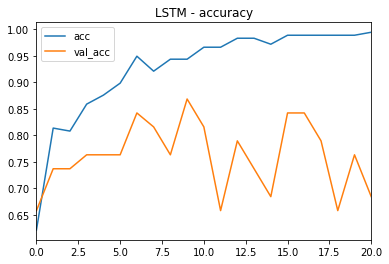

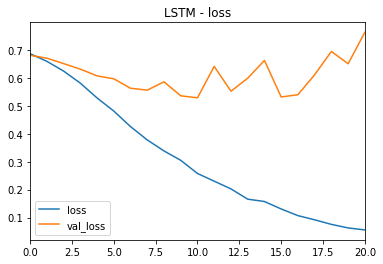

In [36]:
# plot epoch log of the best  - acc
# note: val = test set for optimizer
pd.DataFrame(pd.concat([pd.DataFrame(lstm_model.history['acc'], columns = ['acc']),
                        pd.DataFrame(lstm_model.history['val_acc'], columns = ['val_acc'])
                       ], sort=False)).plot()
plt.legend()
plt.title('LSTM - accuracy')
plt.savefig('./fig/lstm_plot_model_dev_acc.png')


# plot epoch log of the best  - loss
# note: val = test set for optimizer
pd.DataFrame(pd.concat([pd.DataFrame(lstm_model.history['loss'], columns = ['loss']),
                        pd.DataFrame(lstm_model.history['val_loss'], columns = ['val_loss'])
                       ], sort=False)).plot()
plt.legend()
plt.title('LSTM - loss')
plt.savefig('./fig/lstm_plot_model_dev_loss.png')

In [37]:
# evaluate the best model with validation set
_ = np.argmax(lstm_model.history['val_acc'])
print('train accuracy: {:.3f}'.format(lstm_model.history['acc'][_]))
print('test accuracy: {:.3f}'.format(max(lstm_model.history['val_acc'])))
_, lstm_valid_acc = lstm_model.model.evaluate(X_valid_tensor, y_valid_tensor, verbose=0)
print('validation accuracy: {:.3f}'.format(lstm_valid_acc))

train accuracy: 0.944
test accuracy: 0.868
validation accuracy: 0.744


In [38]:
# predict the evaluation set
lstm_y_pred = lstm_model.model.predict_classes(X_valid_tensor)

lstm_y_prob = []
_ = lstm_model.model.predict_proba(X_valid_tensor)
lstm_y_prob = [_[i][1] for i in range(len(_))]

# evaluation model
lstm_validscore = model_eval.eval_matric.all(y_true, lstm_y_pred, lstm_y_prob)
lstm_validscore

{'accuracy': 0.744,
 'precision': 0.727,
 'recall': 0.8,
 'F1': 0.762,
 'auc': 0.9,
 'tn, fn, fp, tp': array([13,  4,  6, 16], dtype=int64),
 'average_precision_score': 0.926}

> Considering the above graphs, LSTM model is prone to overfit.

<b> ROC and PR curve

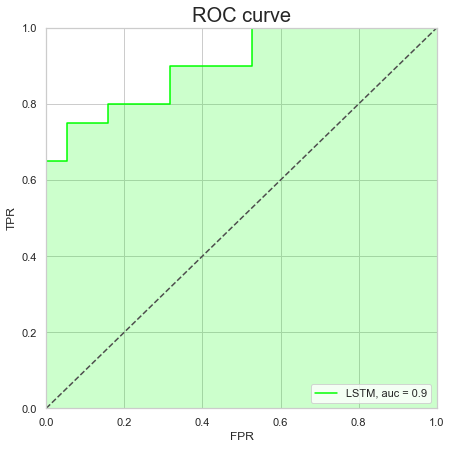

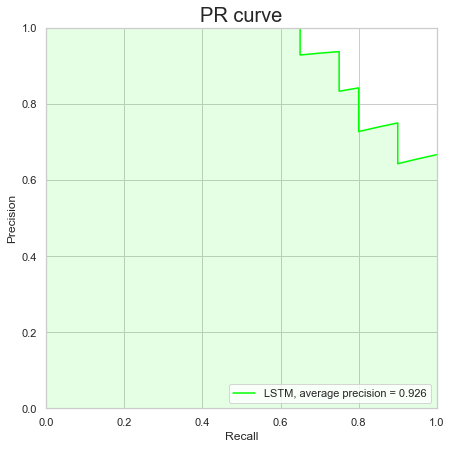

In [39]:
lstm_rocpr = model_eval.roc_pr_matric.all(y_true, lstm_y_prob)

# visualize ROC curve
    # set canvas
sns.set(style="whitegrid")
fig_roc, ax_roc = plt.subplots(figsize=(7, 7))
plt.plot(np.arange(0, 2), np.arange(0, 2), ls="--", c=".3")

    # plot value
ax_roc.plot(lstm_rocpr['roc: fpr-tpr-thresholds'][0],
            lstm_rocpr['roc: fpr-tpr-thresholds'][1],
            color='lime',
            label='LSTM, auc = '+str(lstm_validscore['auc']))

ax_roc.fill_between(lstm_rocpr['roc: fpr-tpr-thresholds'][0],
                    0,
                    lstm_rocpr['roc: fpr-tpr-thresholds'][1],
                    color='lime',
                    alpha=0.2)

    # label axis and legend
ax_roc.set_title('ROC curve', fontsize=20)
ax_roc.set_xlabel('FPR')
ax_roc.set_ylabel('TPR')
ax_roc.set_xlim(left=0, right=1)
ax_roc.set_ylim(bottom=0, top=1)
plt.legend(loc='lower right')


# visualize PR curve
    # set canvas
sns.set(style="whitegrid")
fig_roc, ax_pr = plt.subplots(figsize=(7, 7))

    # plot value
ax_pr.plot(lstm_rocpr['pr: precision-recall'][1],
           lstm_rocpr['pr: precision-recall'][0],
           color='lime',
           label='LSTM, average precision = '+str(lstm_validscore['average_precision_score']))
ax_pr.fill_between(lstm_rocpr['pr: precision-recall'][1],
                   0,
                   lstm_rocpr['pr: precision-recall'][0],
                   color='lime',
                   alpha=0.1)

    # label axis and legend
ax_pr.set_title('PR curve', fontsize=20)
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_xlim(left=0, right=1)
ax_pr.set_ylim(bottom=0, top=1)
plt.legend(loc='lower right')

 > ## CNN

<p style="text-indent: 2.5em;">
    Convolutaion Neural Network is moslty applied with computer vision problem. Nevertheless, it is sometimes used for NLP. In that case, the each word is considered as a pixel whereas an image means a sentence. 

In [46]:
# constrct CNN
def create_cnn_model(X_train, n_cnn_layer, strides, filters_size, n_dense_layer):
    """
    This function is to built the deep learning model structure
    """
    model = Sequential()
    
    # 1st layer - word embedding from pre-trained
    model.add(Embedding(input_dim=vocab_size, input_length = X_train.shape[1],
                        output_dim=100, weights=[embedding_matrix], trainable=False))
    
    # 2nd layer - batch normalization
    model.add(BatchNormalization())
        
    # 3rd layer - CNN
    i = 0
    while i < n_cnn_layer-1:
        model.add(Conv1D(filters=filters_size, kernel_size=kernel_size, strides=strides,
                         activation='relu',
                         kernel_initializer=initializers.RandomNormal(seed=seed),
                         bias_initializer=initializers.RandomNormal(seed=seed)))
        model.add(MaxPooling1D())
        i += 1
    model.add(Conv1D(filters=int(round(filters_size/2,0)), 
                     kernel_size=kernel_size, strides=strides,
                     activation='relu',
                     kernel_initializer=initializers.RandomNormal(seed=seed),
                     bias_initializer=initializers.RandomNormal(seed=seed)))
    model.add(MaxPooling1D())
    
    # 4th layer - flatten
    model.add(Flatten())
    
    # 5th layer - dense
    j = 0
    while j < n_dense_layer-1:
        model.add(Dense(int(round(filters_size/(j+1)*2,0)), activation='relu',
                        kernel_initializer=initializers.he_normal(seed=seed)))
        j += 1            
    model.add(Dense(2, activation='sigmoid',
                    kernel_initializer=initializers.RandomNormal(seed=seed)))
    
    model.compile(loss=losses.categorical_crossentropy, metrics=['accuracy'],
                  optimizer=RMSprop())
    
    return model

### CNN 3.2 Tune hyperparameters

In [47]:
n_cnn_layer_space = [1, 2] #0
strides_space = [1, 3] #1
filters_size_space = [8, 16] #2 - number of filters

kernel_size = 3

In [48]:
cnn_param = [n_cnn_layer_space, strides_space, filters_size_space, n_dense_layer_space, batch_size_space]
cnn_param_dist = list(product(*cnn_param))
len(cnn_param_dist)

32

In [ ]:
# model experiment
cnn_train_acc_log = -1
cnn_test_acc_log = 0
diff = 1

start = time()

i = 7
for i in tqdm(range(len(cnn_param_dist))):    
    
    cnn_temp = create_cnn_model(X_train=X_train_tensor,
                                n_cnn_layer=cnn_param_dist[i][0],
                                strides=cnn_param_dist[i][1], 
                                filters_size=cnn_param_dist[i][2],
                                n_dense_layer=cnn_param_dist[i][3])           
    
    # build and compile the model
    cnn_temp.save('./log/model/cnn_model_log.h5')   
    checkpoint_cb = ModelCheckpoint('./log/model/cnn_model_log.h5', save_best_only=True)  
    temp = cnn_temp.fit(X_train_tensor, y_train_tensor, verbose=0, epochs=n_epochs,
                        batch_size = cnn_param_dist[i][4],
                        validation_data=[X_test_tensor, y_test_tensor],
                        callbacks=[TQDMNotebookCallback(leave_inner=False, leave_outer=False)
                                   ,checkpoint_cb,early_stopping], shuffle=False)
    
    # track the best epoch
    max_test_epoch = np.argmax(cnn_temp.model.history.history['val_acc'])

    # save best model by considering train and test accuracy to control overfitting and underfitting
    if ((temp.history['val_acc'][max_test_epoch] >= cnn_test_acc_log) and \
        (abs(temp.history['val_acc'][max_test_epoch] - temp.history['acc'][max_test_epoch]) < diff)):
                
        # save the maximum test accuracy and related train accuracy
        cnn_train_acc_log = temp.history['acc'][max_test_epoch]
        cnn_test_acc_log = temp.history['val_acc'][max_test_epoch]
        diff = abs(cnn_train_acc_log-cnn_test_acc_log)

        # save the best model with related information
        joblib.dump(temp, './log/model/cnn_model_best.pkl')
        cnn_best_param = cnn_param_dist[i]
        cnn_best_iter = i


    print('total time: ', time()-start)

<u>Note</u><br>
The result still slightly change over the time if the code runs on multi-core CPU.

ref: https://github.com/keras-team/keras/issues/2743

In [50]:
print('best set of parameters:', cnn_best_iter)
print('train accuracy: {:.3f}'.format(cnn_train_acc_log))
print('test accuracy: {:.3f}'.format(cnn_test_acc_log))
print('best parameter:\n  cnn layer = {}\n'.format(cnn_best_param[0])+\
      '  stride = {}\n'.format(cnn_best_param[1])+\
      '  filter size = {}\n'.format(cnn_best_param[2])+\
      '  n dense layer = {}\n'.format(cnn_best_param[3])+\
      '  batch size = {}'.format(cnn_best_param[4]))

best set of parameters: 1
train accuracy: 0.921
test accuracy: 0.711
best parameter:
  cnn layer = 1
  stride = 1
  filter size = 8
  n dense layer = 2
  batch size = 64


### CNN 3.3 Evaluate model performance

In [40]:
# load best model
cnn_model = joblib.load('./log/model/cnn_model_best.pkl')
cnn_model.model.summary()

W0816 14:43:02.464549  7044 deprecation_wrapper.py:119] From C:\Users\Jitsama\Anaconda3\envs\deeplearn_env\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 200, 100)          118400    
_________________________________________________________________
batch_normalization_34 (Batc (None, 200, 100)          400       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 198, 4)            1204      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 99, 4)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 396)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 16)                6352      
_________________________________________________________________
dense_84 (Dense)             (None, 2)                 34        
Total para

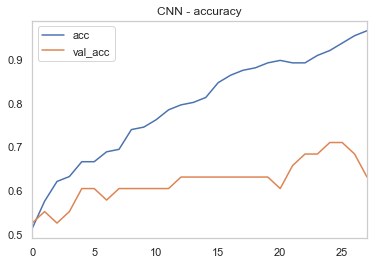

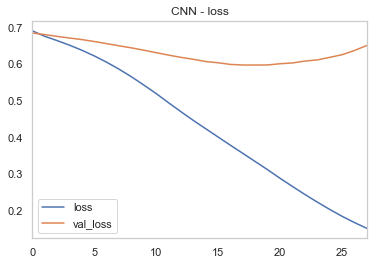

In [41]:
# plot epoch log of the best  - acc
# note: val = test set for optimizer
pd.DataFrame(pd.concat([pd.DataFrame(cnn_model.history['acc'], columns = ['acc']),
                        pd.DataFrame(cnn_model.history['val_acc'], columns = ['val_acc'])
                       ], sort=False)).plot()
plt.legend()
plt.grid(False)
plt.title('CNN - accuracy')
plt.savefig('./fig/cnn_plot_model_dev_acc.png')


# plot epoch log of the best  - loss
# note: val = test set for optimizer
pd.DataFrame(pd.concat([pd.DataFrame(cnn_model.history['loss'], columns = ['loss']),
                        pd.DataFrame(cnn_model.history['val_loss'], columns = ['val_loss'])
                       ], sort=False)).plot()
plt.legend()
plt.grid(False)
plt.title('CNN - loss')
plt.savefig('./fig/cnn_plot_model_dev_loss.png')

In [42]:
# evaluate the best model with validation set
_ = np.argmax(cnn_model.history['val_acc'])
print('train accuracy: {:.3f}'.format(cnn_model.history['acc'][_]))
print('test accuracy: {:.3f}'.format(max(cnn_model.history['val_acc'])))
_, cnn_valid_acc = cnn_model.model.evaluate(X_valid_tensor, y_valid_tensor, verbose=0)
print('validation accuracy: {:.3f}'.format(cnn_valid_acc))

train accuracy: 0.921
test accuracy: 0.711
validation accuracy: 0.744


In [43]:
# predict the evaluation set
cnn_y_pred = cnn_model.model.predict_classes(X_valid_tensor)

cnn_y_prob = []
_ = cnn_model.model.predict_proba(X_valid_tensor)
cnn_y_prob = [_[i][1] for i in range(len(_))]

# evaluation model
cnn_validscore = model_eval.eval_matric.all(y_true, cnn_y_pred, cnn_y_prob)
cnn_validscore

{'accuracy': 0.744,
 'precision': 0.778,
 'recall': 0.7,
 'F1': 0.737,
 'auc': 0.66,
 'tn, fn, fp, tp': array([15,  6,  4, 14], dtype=int64),
 'average_precision_score': 0.656}

> Overfitting is also a problem of CNN

<b> ROC and PR curve

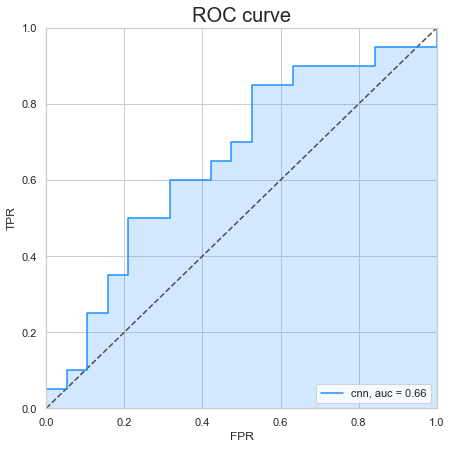

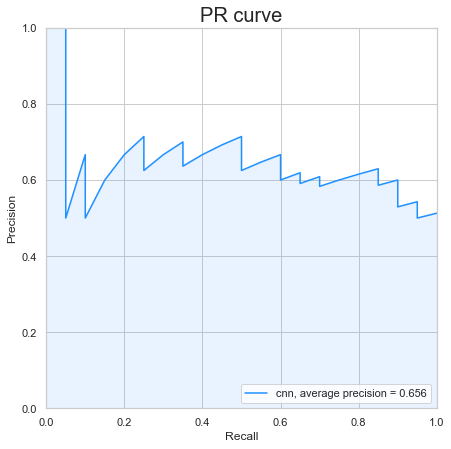

In [44]:
cnn_rocpr = model_eval.roc_pr_matric.all(y_true, cnn_y_prob)


# visualize ROC curve
    # set canvas
sns.set(style="whitegrid")
fig_roc, ax_roc = plt.subplots(figsize=(7, 7))
plt.plot(np.arange(0, 2), np.arange(0, 2), ls="--", c=".3")

    # plot value
ax_roc.plot(cnn_rocpr['roc: fpr-tpr-thresholds'][0],
            cnn_rocpr['roc: fpr-tpr-thresholds'][1],
            color='dodgerblue',
            label='cnn, auc = '+str(cnn_validscore['auc']))

ax_roc.fill_between(cnn_rocpr['roc: fpr-tpr-thresholds'][0],
                    0,
                    cnn_rocpr['roc: fpr-tpr-thresholds'][1],
                    color='dodgerblue',
                    alpha=0.2)

    # label axis and legend
ax_roc.set_title('ROC curve', fontsize=20)
ax_roc.set_xlabel('FPR')
ax_roc.set_ylabel('TPR')
ax_roc.set_xlim(left=0, right=1)
ax_roc.set_ylim(bottom=0, top=1)
plt.legend(loc='lower right')


# visualize PR curve
    # set canvas
sns.set(style="whitegrid")
fig_roc, ax_pr = plt.subplots(figsize=(7, 7))

    # plot value
ax_pr.plot(cnn_rocpr['pr: precision-recall'][1],
           cnn_rocpr['pr: precision-recall'][0],
           color='dodgerblue',
           label='cnn, average precision = '+str(cnn_validscore['average_precision_score']))
ax_pr.fill_between(cnn_rocpr['pr: precision-recall'][1],
                   0,
                   cnn_rocpr['pr: precision-recall'][0],
                   color='dodgerblue',
                   alpha=0.1)

    # label axis and legend
ax_pr.set_title('PR curve', fontsize=20)
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_xlim(left=0, right=1)
ax_pr.set_ylim(bottom=0, top=1)
plt.legend(loc='lower right')

## 4)  Result conclusion

<b> CNN

![](./fig/01_1.3method.PNG)

### 4.1 Analysis on error

In [45]:
error_log = pd.concat([pd.DataFrame(X_valid_df['comment_th']).reset_index(drop=True),
                       pd.DataFrame(X_valid_df['comment_eng']).reset_index(drop=True),
                       pd.DataFrame(X_valid_df['comment_eng_clean']).reset_index(drop=True),
                       pd.DataFrame(y_valid, columns=['y_true']),
                       pd.DataFrame(y_true, columns=['y_code']),
                       pd.DataFrame(lstm_y_pred, columns=['y_lstm']),
                       pd.DataFrame(cnn_y_pred, columns=['y_cnn'])
                      ], axis=1)
error_log['check_lstm'] = error_log.loc[:, 'y_code'] ==  error_log.loc[:, 'y_lstm']
error_log['check_cnn'] = error_log.loc[:, 'y_code'] ==  error_log.loc[:, 'y_cnn']
print('the number of unclear sentiment: {}'.format(len(error_log.loc[(error_log.check_lstm==False) | (error_log.check_cnn==False),:])))

the number of unclear sentiment: 16


> <b> LSTM

In [53]:
print('the number of unclear sentiment: {}'.format(len(error_log.loc[error_log.check_lstm==False,:])))
#error_log.loc[error_log.check_lstm==False,['comment_th', 'comment_eng', 'comment_eng_clean', 'y_true', 'y_lstm']]

the number of unclear sentiment: 10


>> There are 10 errors out of 39 cases from LSTM prediction. They are catagorized into 4 groups as below;
1. Inappropriate satisfaction score
2. Neglection handling
3. Bad translation
4. Complex sentence

![](./fig/03_lstm_error_.PNG)

><b> CNN

In [58]:
print('the number of unclear sentiment: {}'.format(len(error_log.loc[error_log.check_cnn==False,:])))
#error_log.loc[error_log.check_cnn==False,['comment_th', 'comment_eng', 'comment_eng_clean', 'y_true', 'y_cnn']]

the number of unclear sentiment: 10


>> The number of errors from CNN is equal to LSTM. However, the cases are different. There are only 2 types of error found and the details are as below;<br>
1. Inappropriate satisfaction score
2. Neglection handling

![](./fig/03_cnn_error.PNG)

<b> Two models comparison

<p style="text-indent: 2.5em;">
    LSTM and CNN has the same model performance. There are 10 misclassification comments. However, the detial of each model error is different. LSTM consists of 4 types of error including (1) inappropriate satisfaction score, (2) neglection handling, (3) bad translation, and (4) complex sentences. CNN is also has neglection issue. Besides, it is more robust to translation quality but weaker to complex sentences.     
<p style="text-indent: 2.5em;">
    Both models mostly misclassify when the comments are complicated. An example is a comment which combines positive and negative opinion. Sarcasm is also the problem together with word choice from Google Transalate API. Some comments include complaints and related suggestion and the models confuses its sentiment because complaint conveys the negative sense, whereas the suggestion is written positively.

### 4.2 Model discussion and conclusion

#### <b>Discussion

<p style="text-indent: 2.5em;">
    According to the model experiment, both LSTM and CNN model has word embedding as the first layer. The weight from a pre-trained model called "GloVe" is adopted without trainable because this study is small sample size. The rest model structures of each experimental model is as followed;

><b> LSTM

![](./fig/02_final_LSTM.PNG)

>> In the case of LSTM model, there are 2 LSTM and 2 dense layers used after the word embedding layer. An LSTM layer includes 200 cells where 16 units are inside each. Additionally, every cell in the first LSTM layer sends its output to the same sequence cell in the next layer (return sequence). The last two layers are dense. There are 16 nodes and 2 nodes (positive and negative class), respectively.

><b> CNN

![](./fig/02_final_CNN.PNG)

>> CNN model has almost the same structure as LSTM. The last 2 layers, dense, have exactly the same numbers of node each. The convolution layer needs kernel size at 3 for 4 (8/2) layers. Then the output is sent to the pooling layer with max-pooling size at 2. Finally, flatten the last layer before fully connected. It is used to transform the data to be fit with dense input specification.

In [50]:
print('LSTM')
_ = np.argmax(lstm_model.history['val_acc'])
print('  train accuracy: {:.3f}'.format(lstm_model.history['acc'][_]))
print('  test accuracy: {:.3f}'.format(max(lstm_model.history['val_acc'])))
print('  validation accuracy: {:.3f}'.format(lstm_valid_acc))
print('  {}\n\n\n'.format(lstm_validscore))


print('CNN')
_ = np.argmax(cnn_model.history['val_acc'])
print('  train accuracy: {:.3f}'.format(cnn_model.history['acc'][_]))
print('  test accuracy: {:.3f}'.format(max(cnn_model.history['val_acc'])))
print('  validation accuracy: {:.3f}'.format(cnn_valid_acc))
print('  {}\n\n\n'.format(cnn_validscore))

LSTM
  train accuracy: 0.944
  test accuracy: 0.868
  validation accuracy: 0.744
  {'accuracy': 0.744, 'precision': 0.727, 'recall': 0.8, 'F1': 0.762, 'auc': 0.9, 'tn, fn, fp, tp': array([13,  4,  6, 16], dtype=int64), 'average_precision_score': 0.926}



CNN
  train accuracy: 0.921
  test accuracy: 0.711
  validation accuracy: 0.744
  {'accuracy': 0.744, 'precision': 0.778, 'recall': 0.7, 'F1': 0.737, 'auc': 0.66, 'tn, fn, fp, tp': array([15,  6,  4, 14], dtype=int64), 'average_precision_score': 0.656}





>> <p style="text-indent: 2.5em;"> When considering both model performance, <b>LSTM is better than CNN</b>. A possible reason is the model concept. LSTM is designed to handle a task which its sequencial is matter. In roughly concept, the output from current stage will be input from the next stage.
>> <p style="text-indent: 2.5em;">
CNN is mostly used for computer vision which there is a massive number of inputs (typically at a pixel level). An objective of convolution and pooling layer is the dimensional reduction. Their concept is to keep only the values which are the best in representing an image. For example, the higher value means more color intensity, and it is held only. When an image contains only dark color (i.e., keep only blue and eliminate baby blue), its shape and property are still preserved. Sometimes each image element is more meaningful after adjusting the contrast. In the case of NLP task, the input value cannot be interpreted directly. The higher weight does not mean it is more meaningful, and to eliminate a word can completely change a sentence meaning. Hence, a comment may lose or change some information when passing it through convolution and pooling layer.
>> <p style="text-indent: 2.5em;">
    CNN is more overfitting than LSTM. The gap between its train and test accuracy is wider than LSTM. A possible reason is a dropout. This CNN model does not contain any dropout while the LSTM model has 2 dropout units inside each cell.

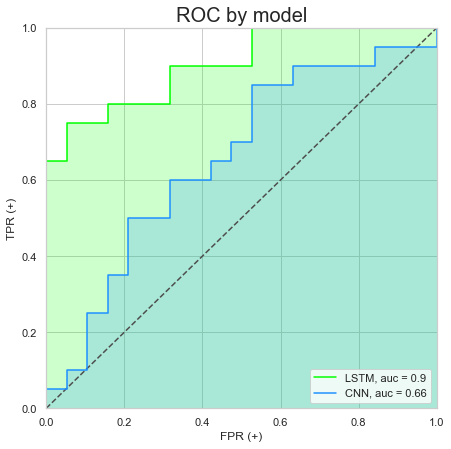

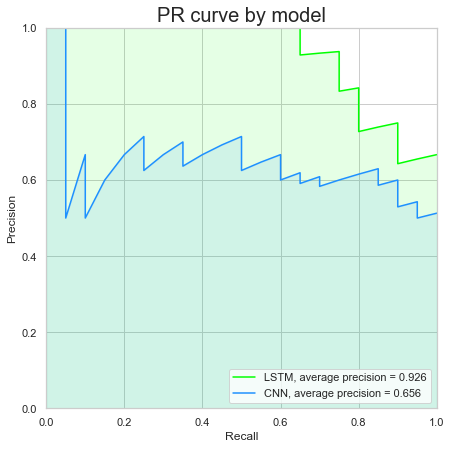

In [60]:
#summarize ROC curve - positive class
sns.set(style="whitegrid")
fig_roc, ax_roc = plt.subplots(figsize=(7, 7))
plt.plot(np.arange(0, 2), np.arange(0, 2), ls="--", c=".3")

    #lstm
ax_roc.plot(lstm_rocpr['roc: fpr-tpr-thresholds'][0],
            lstm_rocpr['roc: fpr-tpr-thresholds'][1],
            color='lime',
            label='LSTM, auc = '+str(lstm_validscore['auc']))

ax_roc.fill_between(lstm_rocpr['roc: fpr-tpr-thresholds'][0],
                    0,
                    lstm_rocpr['roc: fpr-tpr-thresholds'][1],
                    color='lime',
                    alpha=0.2)

    #cnn
ax_roc.plot(cnn_rocpr['roc: fpr-tpr-thresholds'][0],
            cnn_rocpr['roc: fpr-tpr-thresholds'][1],
            color='dodgerblue',
            label='CNN, auc = '+str(cnn_validscore['auc']))

ax_roc.fill_between(cnn_rocpr['roc: fpr-tpr-thresholds'][0],
                    0,
                    cnn_rocpr['roc: fpr-tpr-thresholds'][1],
                    color='dodgerblue',
                    alpha=0.2)

#
ax_roc.set_title('ROC by model', fontsize=20)
ax_roc.set_xlabel('FPR (+)')
ax_roc.set_ylabel('TPR (+)')
ax_roc.set_xlim(left=0, right=1)
ax_roc.set_ylim(bottom=0, top=1)
plt.legend(loc='lower right')



#summarize PR curve
sns.set(style="whitegrid")
fig_roc, ax_pr = plt.subplots(figsize=(7, 7))

    #lstm
ax_pr.plot(lstm_rocpr['pr: precision-recall'][1],
           lstm_rocpr['pr: precision-recall'][0],
           color='lime',
           label='LSTM, average precision = '+str(lstm_validscore['average_precision_score']))
ax_pr.fill_between(lstm_rocpr['pr: precision-recall'][1],
                   0,
                   lstm_rocpr['pr: precision-recall'][0],
                   color='lime',
                   alpha=0.1)

    #cnn
ax_pr.plot(cnn_rocpr['pr: precision-recall'][1],
           cnn_rocpr['pr: precision-recall'][0],
           color='dodgerblue',
           label='CNN, average precision = '+str(cnn_validscore['average_precision_score']))
ax_pr.fill_between(cnn_rocpr['pr: precision-recall'][1],
                   0,
                   cnn_rocpr['pr: precision-recall'][0],
                   color='dodgerblue',
                   alpha=0.1)

#
ax_pr.set_title('PR curve by model', fontsize=20)
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_xlim(left=0, right=1)
ax_pr.set_ylim(bottom=0, top=1)
plt.legend(loc='lower right')

> This study has balance class data. Therefore, ROC and PR curve can be used as model evaluation matrics. The results present that LSTM outperform CNN. Both AUC and average precision of LSTM are greater than CNN about 30%.

#### Conclusion

<p style="text-indent: 2.5em;">
    This study objective is to develop a deep learning model for sentiment analysis. The comments from real customers of Ramathibodi, Chulalongkorn, and Siriraj hospital are scraped from a Webboard and used for the model experiment. Since the comments are Thai and English, they are standardized by anchoring English. Google translate API is the tool of this task.
<p style="text-indent: 2.5em;">
    In term of the model experiment, LSTM and CNN are considered as the representative of sequential and non-sequential model. The result presents that LSTM has better performance than CNN and it is less overfitting. One possible reason is the model concept. CNN model is developed based on computer vision problem while LSTM model follows the sense of reading. The overfitting problem could be becuse of dropout. The CNN in this study does not set the dropout layer while LSTM has both dropout and recurrent dropout in each cell.
<p style="text-indent: 2.5em;">
    A few <b>limitations</b> of this study are the only source of comments, translation method, and sample size. One source of comments could lead to the bias conclusion because it might not cover the characteristics of the whole customer. For example, people who have internet competency has to has some education whereas some patients from the countryside are illegible. This different background could alter the perception of service and operation. The second limitation is about translation. All Thai comments are translated into English using Google translate API so that they are not in natural language. Also, this study includes small sample size, especially for deep learning model. The issue is worse when developing deep learning model since it induces model overfitting.

### 4.3 Sentiment analysis

<p style="text-indent: 2.5em;">
    According to the result from model experiment, LSTM is used to predict the comment sentiment.

><b>Rama

In [61]:
# predict sentiment
_ = comment_score_dedup_extr[comment_score_dedup_extr['hos_flg']=='rama'].iloc[:,6]
rama_tensor, _ = nlp_catout_test(X_test=_, y_test=[], tokenizer=tokenizer, max_len=max_len)
rama_pred = lstm_model.model.predict_classes(rama_tensor)

# concate the result with original data
_ = pd.DataFrame(comment_score_dedup_extr.loc[comment_score_dedup_extr.hos_flg=='rama',
                                              'comment_eng_clean']).reset_index(drop=True)
rama = pd.concat([_, comment_score_dedup_extr.loc[comment_score_dedup_extr.hos_flg=='rama',
                                                  'comment_eng'].reset_index(drop=True),
                  pd.DataFrame(rama_pred, columns=['y_pred'])], axis=1)

Shape of data tensor - train test: (208, 200)


- Positive comment:

In [62]:
# extract noun phrase
rama_pos, rama_np_pos = txt_proc.shallow_np(rama.loc[rama.y_pred==0, 'comment_eng'])

# top word list
rama_nppos, rama_nppos_bow = wordsum.bow(rama_np_pos)
rama_nppos_bow.head(5)

100%|████████████████████████████████████████████████████████████████████████████████| 119/119 [04:22<00:00,  2.24s/it]


,index,freq
0,hospital,12
1,good service,12
2,long time,7
3,good care,6
4,state hospital,5


<module 'matplotlib.pyplot' from 'C:\\Users\\Jitsama\\Anaconda3\\envs\\deeplearn_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

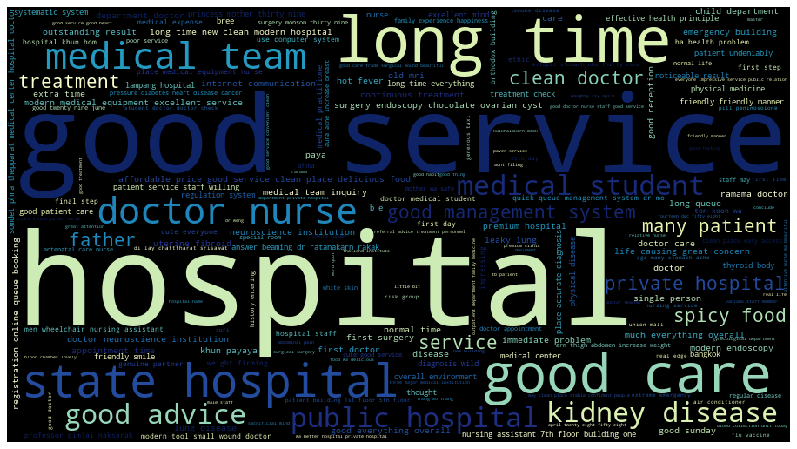

In [63]:
# word cloud Rama
wordsum.wordc(rama_nppos, clr=matplotlib.cm.YlGnBu)

>> The result apparents that Ramathibodi is outstanding in service and care.

- Negative comment:

In [64]:
rama_neg, rama_np_neg = txt_proc.shallow_np(rama.loc[rama.y_pred==1, 'comment_eng'])

# top word list
rama_npneg, rama_npneg_bow = wordsum.bow(rama_np_neg)
rama_npneg_bow.head(5)

100%|██████████████████████████████████████████████████████████████████████████████████| 89/89 [03:24<00:00,  2.21s/it]


,index,freq
0,long time,7
1,hospital,6
2,first time,5
3,many patient,4
4,time,3


<module 'matplotlib.pyplot' from 'C:\\Users\\Jitsama\\Anaconda3\\envs\\deeplearn_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

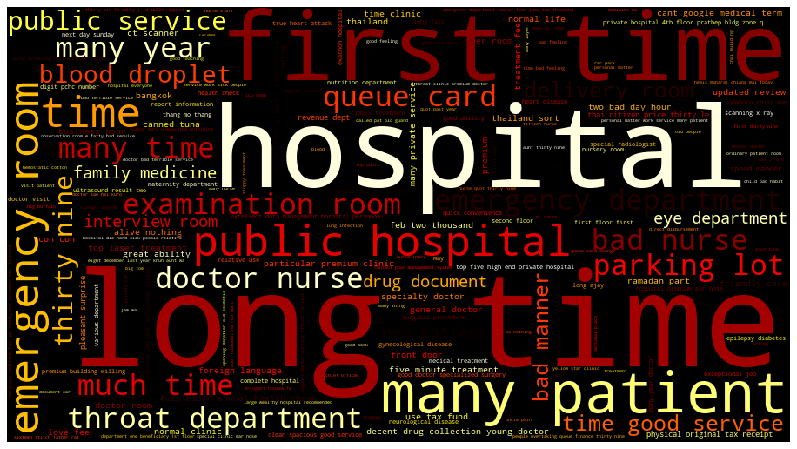

In [65]:
# word cloud Rama
wordsum.wordc(rama_npneg, clr=matplotlib.cm.hot)

>>"Long time", "many patient" and "first time" are the main keyword found in negative comments.

><b>Chula

In [66]:
# predict sentiment
_ = comment_score_dedup_extr[comment_score_dedup_extr['hos_flg']=='chula'].iloc[:,6]
chula_tensor, _ = nlp_catout_test(X_test=_, y_test=[], tokenizer=tokenizer, max_len=max_len)
chula_pred = lstm_model.model.predict_classes(chula_tensor)

# concate the result with original data
_ = pd.DataFrame(comment_score_dedup_extr.loc[comment_score_dedup_extr.hos_flg=='chula',
                                              'comment_eng_clean']).reset_index(drop=True)
chula = pd.concat([_, comment_score_dedup_extr.loc[comment_score_dedup_extr.hos_flg=='chula',
                                                  'comment_eng'].reset_index(drop=True),
                  pd.DataFrame(chula_pred, columns=['y_pred'])], axis=1)

Shape of data tensor - train test: (313, 200)


- Positive comment:

In [67]:
# extract noun phrase
chula_pos, chula_np_pos = txt_proc.shallow_np(chula.loc[chula.y_pred==0, 'comment_eng'])

# top word list
chula_nppos, chula_nppos_bow = wordsum.bow(chula_np_pos)
chula_nppos_bow.head(5)

100%|████████████████████████████████████████████████████████████████████████████████| 185/185 [07:49<00:00,  2.56s/it]


,index,freq
0,good service,16
1,hospital,9
2,good care,8
3,long time,6
4,good advice,3


<module 'matplotlib.pyplot' from 'C:\\Users\\Jitsama\\Anaconda3\\envs\\deeplearn_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

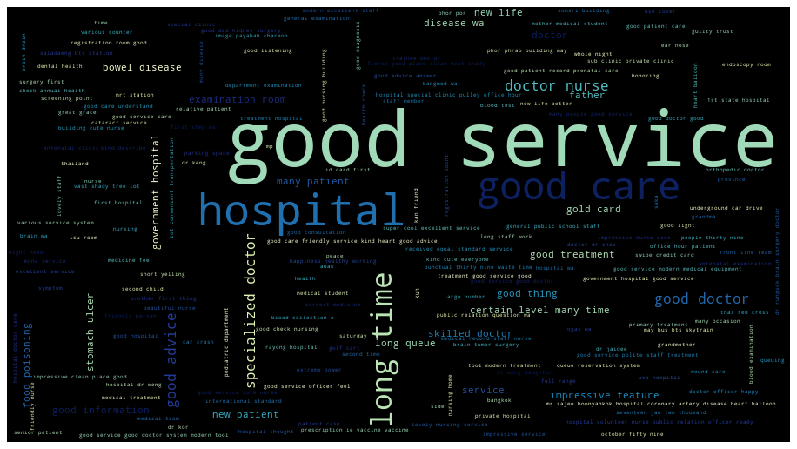

In [68]:
# word cloud CU
wordsum.wordc(chula_nppos, clr=matplotlib.cm.YlGnBu)

>> Chula is mainly good in service and care as same as Ramathibodi.

- Negative comment:

In [69]:
# extract noun phrase
chula_neg, chula_np_neg = txt_proc.shallow_np(chula.loc[chula.y_pred==1, 'comment_eng'])

# top word list
chula_npneg, chula_npneg_bow = wordsum.bow(chula_np_neg)

chula_npneg_bow.head(5)

100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [04:54<00:00,  1.96s/it]


,index,freq
0,hospital,17
1,long time,14
2,thirty nine,6
3,emergency room,4
4,public hospital,4


<module 'matplotlib.pyplot' from 'C:\\Users\\Jitsama\\Anaconda3\\envs\\deeplearn_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

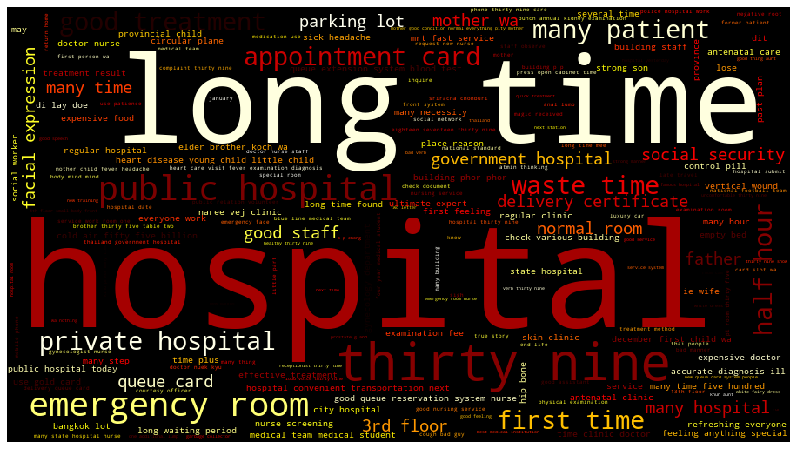

In [70]:
# word cloud CU
wordsum.wordc(chula_npneg, clr=matplotlib.cm.hot)

>> The main problems are long time and emergency room.

><b>Siriraj

In [71]:
# predict sentiment
_ = comment_score_dedup_extr[comment_score_dedup_extr['hos_flg']=='siriraj'].iloc[:,6]
siriraj_tensor, _ = nlp_catout_test(X_test=_, y_test=[], tokenizer=tokenizer, max_len=max_len)
siriraj_pred = lstm_model.model.predict_classes(siriraj_tensor)

# concate the result with original data
_ = pd.DataFrame(comment_score_dedup_extr.loc[comment_score_dedup_extr.hos_flg=='siriraj',
                                              'comment_eng_clean']).reset_index(drop=True)
siriraj = pd.concat([_, comment_score_dedup_extr.loc[comment_score_dedup_extr.hos_flg=='siriraj',
                                                  'comment_eng'].reset_index(drop=True),
                  pd.DataFrame(siriraj_pred, columns=['y_pred'])], axis=1)

Shape of data tensor - train test: (118, 200)


- Positive comment:

In [72]:
# extract noun phrase
siriraj_pos, siriraj_np_pos = txt_proc.shallow_np(siriraj.loc[siriraj.y_pred==0, 'comment_eng'])

# top word list
siriraj_nppos, siriraj_nppos_bow = wordsum.bow(siriraj_np_pos)
siriraj_nppos_bow.head(5)

100%|██████████████████████████████████████████████████████████████████████████████████| 84/84 [03:11<00:00,  2.39s/it]


,index,freq
0,hospital,14
1,long time,5
2,good treatment,5
3,good advice,5
4,good service,4


<module 'matplotlib.pyplot' from 'C:\\Users\\Jitsama\\Anaconda3\\envs\\deeplearn_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

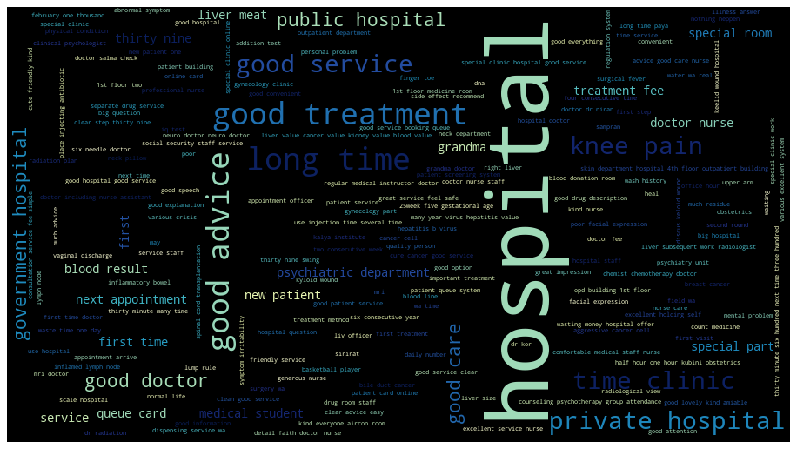

In [73]:
# word cloud Siriraj
wordsum.wordc(siriraj_nppos, clr=matplotlib.cm.YlGnBu)

>> The main key words from positive comments of Siriraj are "good advice", "good treatment", and "first time".

- Negative comment:

In [76]:
# extract noun phrase
siriraj_neg, siriraj_np_neg = txt_proc.shallow_np(siriraj.loc[siriraj.y_pred==1, 'comment_eng'])

# top word list
siriraj_npneg, siriraj_npneg_bow = wordsum.bow(siriraj_np_neg)
siriraj_npneg_bow.head(5)

100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [01:09<00:00,  1.99s/it]


,index,freq
0,hospital,5
1,long time,5
2,first time,4
3,whole day,2
4,various building,2


<module 'matplotlib.pyplot' from 'C:\\Users\\Jitsama\\Anaconda3\\envs\\deeplearn_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

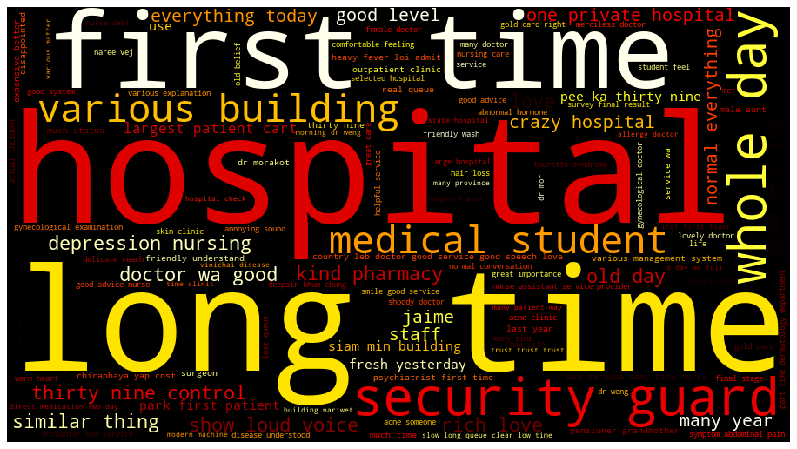

In [77]:
# word cloud Siriraj
wordsum.wordc(siriraj_npneg, clr=matplotlib.cm.hot)

>> The number of buildings are the problem of the hospitla as well as long time and first time.

<p style="text-indent: 2.5em;">
   To summarize, "long time" is a common problem among these hospitals. In the case of Ramathibodi, the case of long time also appears as the top words in negative comment. It is "many patient". A basic solution is to improve customer experience, such as an application to alert queue status. However, a more sustainable way is to improve work efficiency. The workflow should be carefully revised to point out the bottleneck, and the redundant works which do not have value-added should be eliminated. Additionally, the computerization such as Computerize Provider Order Entry (CPOE) system can be an option to accelerate the working process.

<p style="text-indent: 2.5em;">
    In the case of Ramathibodi, another problem is first time visit. New customers might not know the workflow yet so that they perceive unnecessary long waiting time. This problem is about the communication gap, and staffs should thoroughly explain the process to new customers. A poster can also be used in this case to remove staffs' burden. The first time registration could also be the cause of the long waiting time — a few paperwork needed during the process. Therefore, new customers have to wait for both registrations and seeing a doctor. Online and advanced registration can figure out this issue. Once customer registered online application, they just come to the hospital, receive the HN card and wait for treatment.

<p style="text-indent: 2.5em;">
    Emergency room (ER) is the problem of Chalalongkorn hospital. The number of patients outweights staff. Therefore, they have to wait for the treatment. In the perspective of patients' family, the waiting time is unacceptable because they might not know how urgent of the symptoms. Sometimes it is not a life-threatening as they think. This problem can be slove by staffs' communciation as well as increase the number of staff in ER. Prioriritize queue transparently is also improve the waiting experience.
       
<p style="text-indent: 2.5em;">
    The last hospital to be discussed is Siriraj. Most problems are quite similar to the other 2 hospitals. The only different problem is "various buildings". Patients confuse the building when visiting the hospital, and this problem could be solved by labeling the building name apparently. Educate staffs to be able to give customer direction is also useful.

<B>Acknowledgement:</B><br>
 Thanks to the team for brainstorming solution idea.

- https://github.com/perlestot/<br>
- https://github.com/patratorn/<br>
- https://github.com/petchpanu/<br>
- https://github.com/ponthongmak/<br>